In [ ]:
'''
************************************
*                                  *
*   Predicting Employee Attrition  *
*                                  *
************************************

Group B
--------------------
Hawa Touray
Abdullah Alam
Jay Sadrani
Cheick Amed Diallo
Enkel Mezini

'''

'\n************************************\n*                                  *\n*   Predicting Employee Attrition  *\n*                                  *\n************************************\n\nGroup B\n--------------------\nHawa Touray\nAbdullah Alam\nJay Sadrani\nCheick Amed Diallo\nEnkel Mezini\n\n'

In [ ]:
'''

IMPORT LIBRARIES

'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import FuncFormatter
import seaborn as sns






In [ ]:
'''

IMPORT DATASET INTO DATAFRAME

'''

url = 'https://raw.githubusercontent.com/shantanu1109/IBM-HR-Analytics-Employee-Attrition-and-Performance-Prediction/main/DATASET/IBM-HR-Analytics-Employee-Attrition-and-Performance-Revised.csv'

df = pd.read_csv(url)



In [ ]:
'''

DATA DESCRIPTION

'''

'\n\nDATA DESCRIPTION\n\n'

In [ ]:
df.shape

(1470, 31)

In [ ]:
columns = df.columns.tolist()
print("COLUMN NAMES")
print("------------")
for column in columns:
    print("-" + column)

COLUMN NAMES
------------
-Age
-Attrition
-BusinessTravel
-DailyRate
-Department
-DistanceFromHome
-Education
-EducationField
-EnvironmentSatisfaction
-Gender
-HourlyRate
-JobInvolvement
-JobLevel
-JobRole
-JobSatisfaction
-MaritalStatus
-MonthlyIncome
-MonthlyRate
-NumCompaniesWorked
-OverTime
-PercentSalaryHike
-PerformanceRating
-RelationshipSatisfaction
-StockOptionLevel
-TotalWorkingYears
-TrainingTimesLastYear
-WorkLifeBalance
-YearsAtCompany
-YearsInCurrentRole
-YearsSinceLastPromotion
-YearsWithCurrManager


In [ ]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Excellent,Very High,1,6,3,Better,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,College,Life Sciences,Very High,Male,...,Excellent,High,0,8,2,Good,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,Bachelor,Medical,High,Female,...,Outstanding,Low,3,12,3,Good,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,Below College,Life Sciences,Very High,Male,...,Outstanding,Medium,1,1,2,Better,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,Bachelor,Life Sciences,Very High,Male,...,Outstanding,Medium,0,10,2,Better,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,Bachelor,Medical,High,Male,...,Excellent,Medium,2,17,3,Good,7,7,7,7


In [ ]:
attrition_counts = df['Attrition'].value_counts()
print(attrition_counts)

Attrition
No     1233
Yes     237
Name: count, dtype: int64


In [ ]:
attrition_counts = df['JobSatisfaction'].value_counts()
print(attrition_counts)

JobSatisfaction
Very High    459
High         442
Low          289
Medium       280
Name: count, dtype: int64


In [ ]:

attrition_counts = df['YearsAtCompany'].value_counts()


employees_over_25_years = df[df['YearsAtCompany'] > 25].shape[0]


print(employees_over_25_years)


25


In [ ]:
attrition_counts = df['DailyRate'].max()
print(attrition_counts)

1499


In [ ]:
# Assuming you have a DataFrame called 'df'
column_info = pd.DataFrame(df.dtypes, columns=['Data Type']).reset_index()
column_info.columns = ['Column Name', 'Data Type']

# Display the column names and their data types
print(column_info)


                 Column Name Data Type
0                        Age     int64
1                  Attrition    object
2             BusinessTravel    object
3                  DailyRate     int64
4                 Department    object
5           DistanceFromHome     int64
6                  Education    object
7             EducationField    object
8    EnvironmentSatisfaction    object
9                     Gender    object
10                HourlyRate     int64
11            JobInvolvement    object
12                  JobLevel    object
13                   JobRole    object
14           JobSatisfaction    object
15             MaritalStatus    object
16             MonthlyIncome     int64
17               MonthlyRate     int64
18        NumCompaniesWorked     int64
19                  OverTime    object
20         PercentSalaryHike     int64
21         PerformanceRating    object
22  RelationshipSatisfaction    object
23          StockOptionLevel     int64
24         TotalWorkingYe

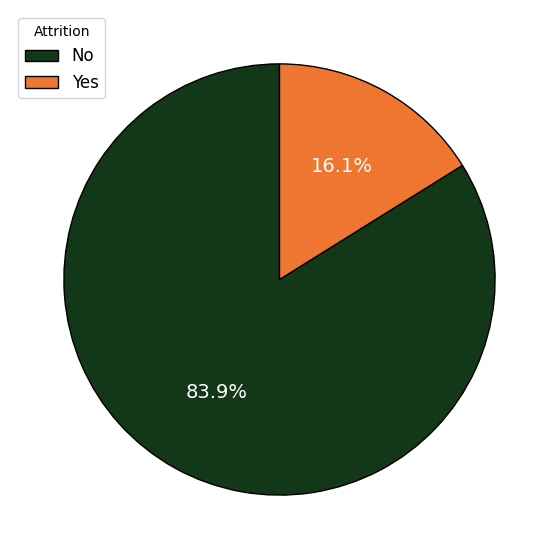

In [ ]:

# Count occurrences of 'Yes' and 'No' in the 'Attrition' column
attrition_counts = df['Attrition'].value_counts()

# Plot a pie chart
plt.figure(figsize=(7, 7), facecolor='none')
attrition_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#133817', '#ee7630'], textprops={'color': 'white', 'fontsize': 14}, wedgeprops={'edgecolor': 'black'})

# Add title
# plt.title('Attrition Proportions Total', fontsize=16)

# Add legend
plt.legend(attrition_counts.index, title='Attrition', loc='upper left', fontsize=12)

# Display the plot
plt.ylabel('')  # Remove the label for y-axis
plt.show()


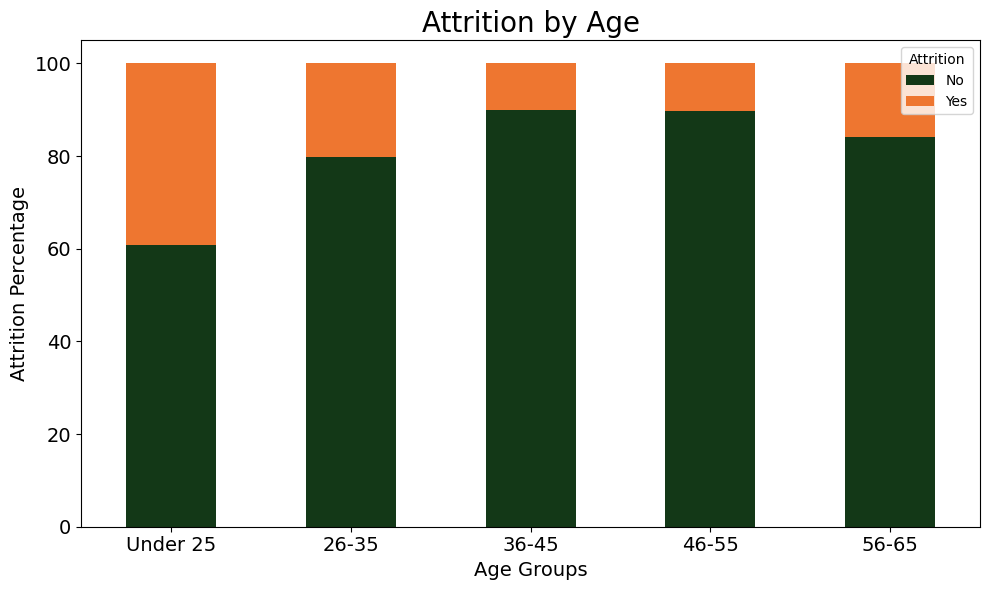

In [ ]:
# Define age bins and labels
bins = [0, 25, 35, 45, 55, 65, 100]  # Define the age bins
labels = ['Under 25', '26-35', '36-45', '46-55', '56-65', '66+']  # Labels for the age groups
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Count occurrences of 'Yes' and 'No' in the 'Attrition' column for each age group
attrition_age_group = pd.crosstab(df['Age Group'], df['Attrition'])

# Calculate the total count of employees in each age group
total_count_per_group = attrition_age_group.sum(axis=1)

# Calculate the percentage of 'Yes' and 'No' for each age group
attrition_percentage = attrition_age_group.div(total_count_per_group, axis=0) * 100

# Create a figure with transparent background
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a stacked bar chart with custom colors
attrition_percentage.plot(kind='bar', stacked=True, color=['#133817', '#ee7630'], ax=ax)

# Add title and labels
plt.title('Attrition by Age', fontsize=20)
plt.xlabel('Age Groups', fontsize=14)
plt.ylabel('Attrition Percentage', fontsize=14)



# Rotate x-axis labels for better readability
plt.xticks(rotation=0, fontsize=14)
plt.yticks(rotation=0, fontsize=14)

# Make the background transparent
fig.patch.set_alpha(0)  # Set the figure background to transparent
ax.set_facecolor('none')  # Set the axes background to transparent

# Adjust layout to make everything fit
plt.tight_layout()

# Show the plot
plt.show()

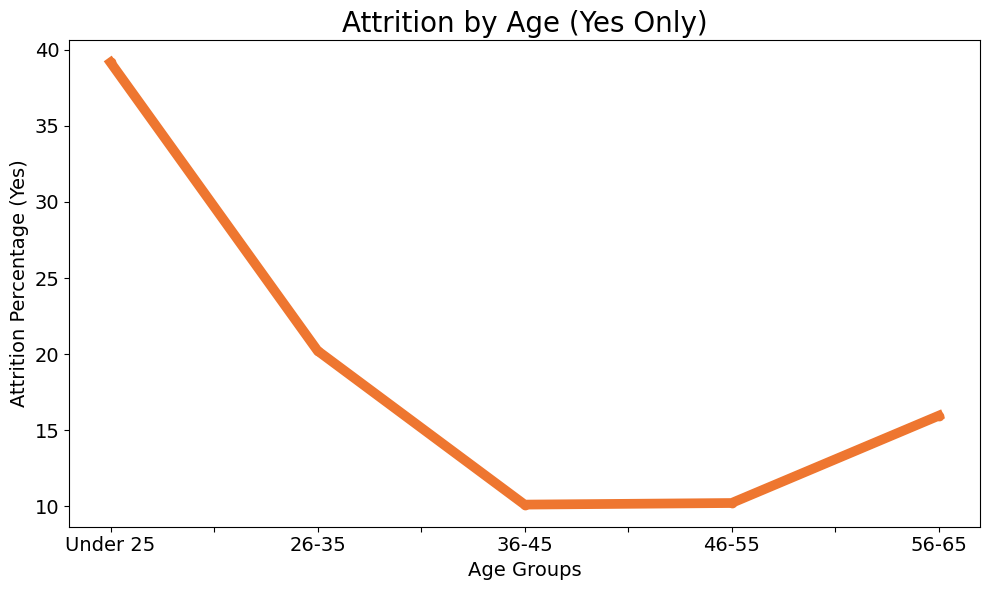

In [ ]:
# Define age bins and labels
bins = [0, 25, 35, 45, 55, 65, 100]  # Define the age bins
labels = ['Under 25', '26-35', '36-45', '46-55', '56-65', '66+']  # Labels for the age groups
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Count occurrences of 'Yes' and 'No' in the 'Attrition' column for each age group
attrition_age_group = pd.crosstab(df['Age Group'], df['Attrition'])

# Calculate the total count of employees in each age group
total_count_per_group = attrition_age_group.sum(axis=1)

# Calculate the percentage of 'Yes' and 'No' for each age group
attrition_percentage = attrition_age_group.div(total_count_per_group, axis=0) * 100

# Create a figure with transparent background
fig, ax = plt.subplots(figsize=(10, 6))

# Plot only the 'Yes' attrition percentage with line width set to 7
attrition_percentage['Yes'].plot(kind='line', marker='o', color='#ee7630', ax=ax, linewidth=7)

# Add title and labels
plt.title('Attrition by Age (Yes Only)', fontsize=20)
plt.xlabel('Age Groups', fontsize=14)
plt.ylabel('Attrition Percentage (Yes)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, fontsize=14)
plt.yticks(rotation=0, fontsize=14)

# Make the background transparent
fig.patch.set_alpha(0)  # Set the figure background to transparent
ax.set_facecolor('none')  # Set the axes background to transparent

# Adjust layout to make everything fit
plt.tight_layout()

# Show the plot
plt.show()


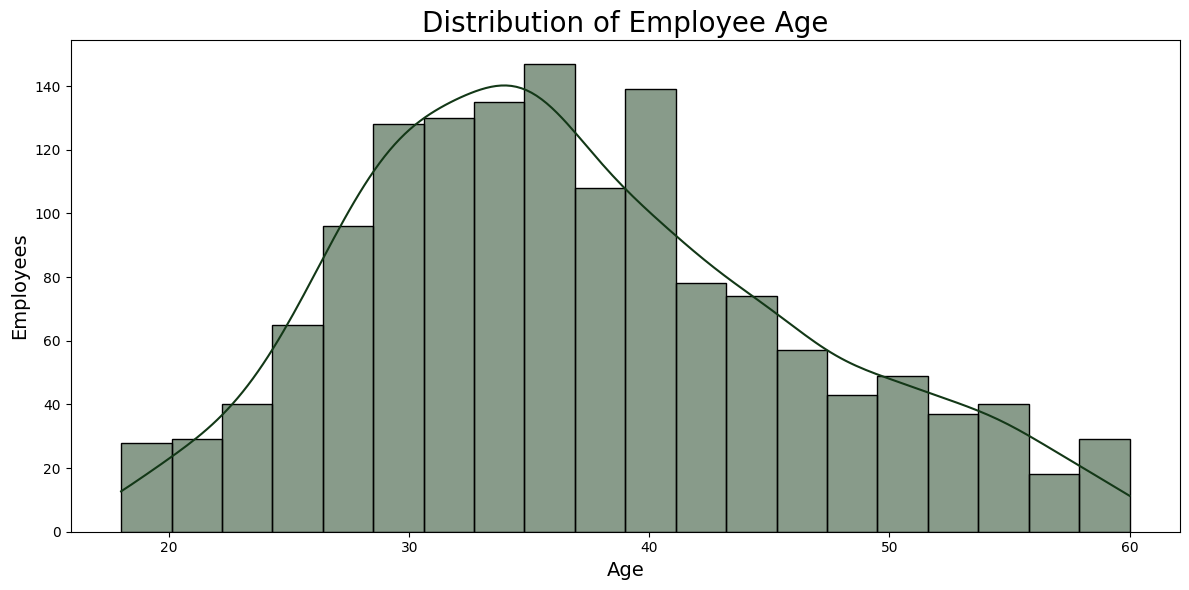

In [ ]:
# Plotting the histogram for Age
plt.figure(figsize=(12, 6))
hist = sns.histplot(df['Age'], kde=True, bins=20, color='#133817', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Employee Age', fontsize=20)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Employees', fontsize=14)

# Make the background of axes transparent
plt.gca().set_facecolor('none')  # Set axes background to transparent
plt.gcf().patch.set_alpha(0)  # Set figure background to transparent

# Display the plot
plt.tight_layout()
plt.show()


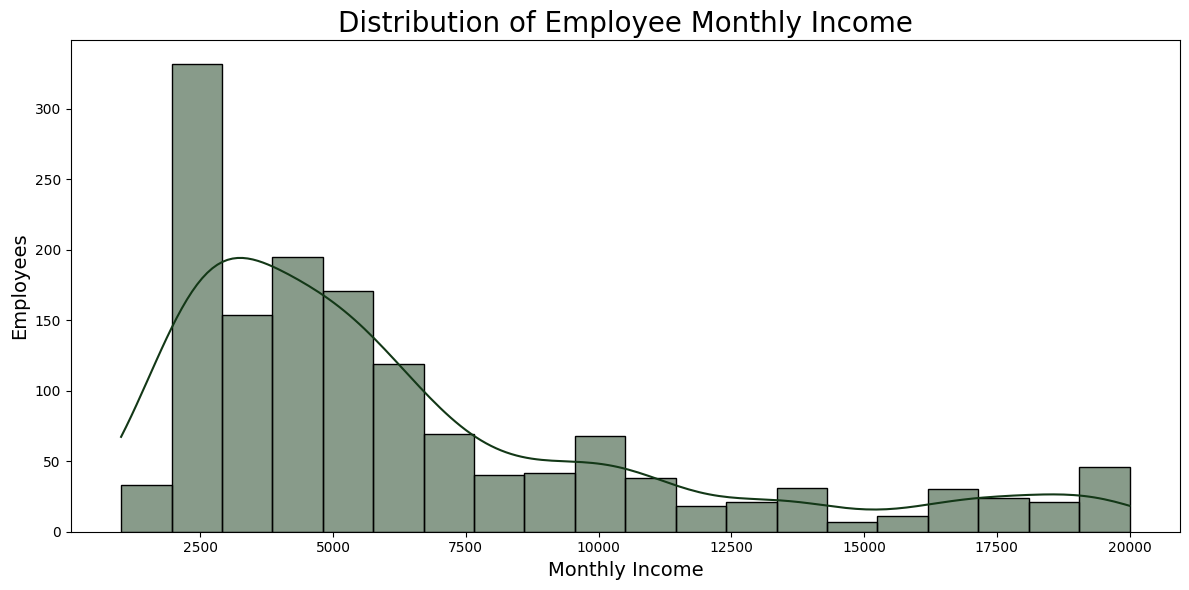

In [ ]:
# Plotting the histogram for Monthly Income
plt.figure(figsize=(12, 6))
hist = sns.histplot(df['MonthlyIncome'], kde=True, bins=20, color='#133817', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Employee Monthly Income', fontsize=20)
plt.xlabel('Monthly Income', fontsize=14)
plt.ylabel('Employees', fontsize=14)

# Make the background of axes transparent
plt.gca().set_facecolor('none')  # Set axes background to transparent
plt.gcf().patch.set_alpha(0)  # Set figure background to transparent

# Display the plot
plt.tight_layout()
plt.show()

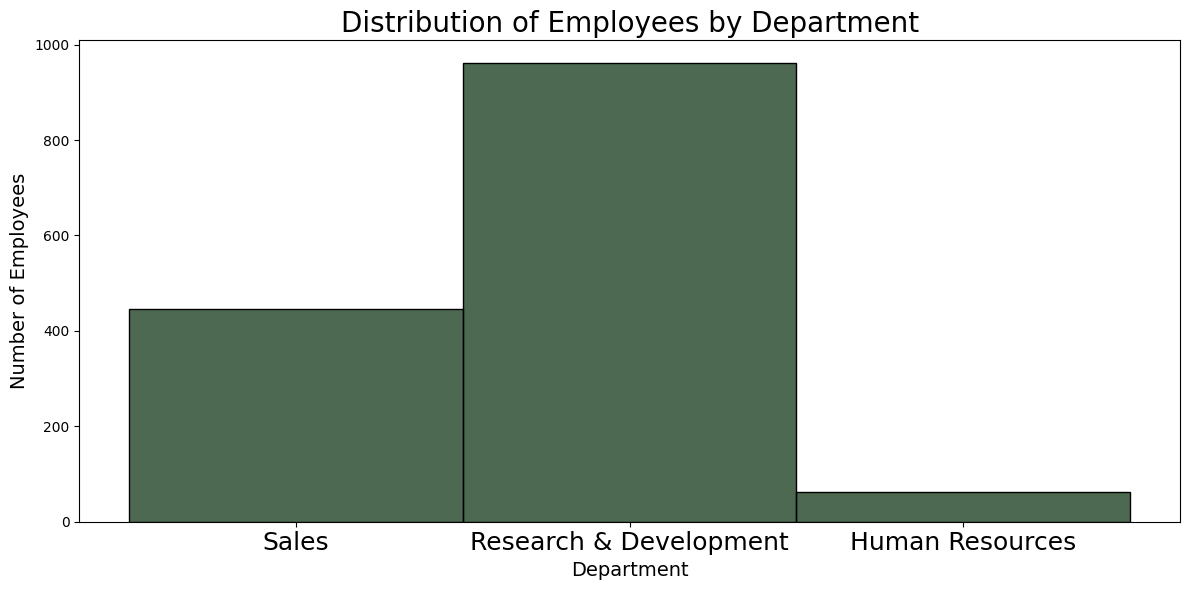

In [ ]:
# Plotting a histogram for Department
plt.figure(figsize=(12, 6))
sns.histplot(df['Department'], kde=False, bins=len(df['Department'].unique()), color='#133817', discrete=True, edgecolor='black')

# Add titles and labels
plt.title('Distribution of Employees by Department', fontsize=20)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Number of Employees', fontsize=14)

# Increase the font size of the department names on the x-axis
plt.xticks(fontsize=18, rotation=0)  # Adjust font size and rotate for better readability

# Make the background of axes transparent
plt.gca().set_facecolor('none')  # Set axes background to transparent
plt.gcf().patch.set_alpha(0)  # Set figure background to transparent

# Display the plot
plt.tight_layout()
plt.show()


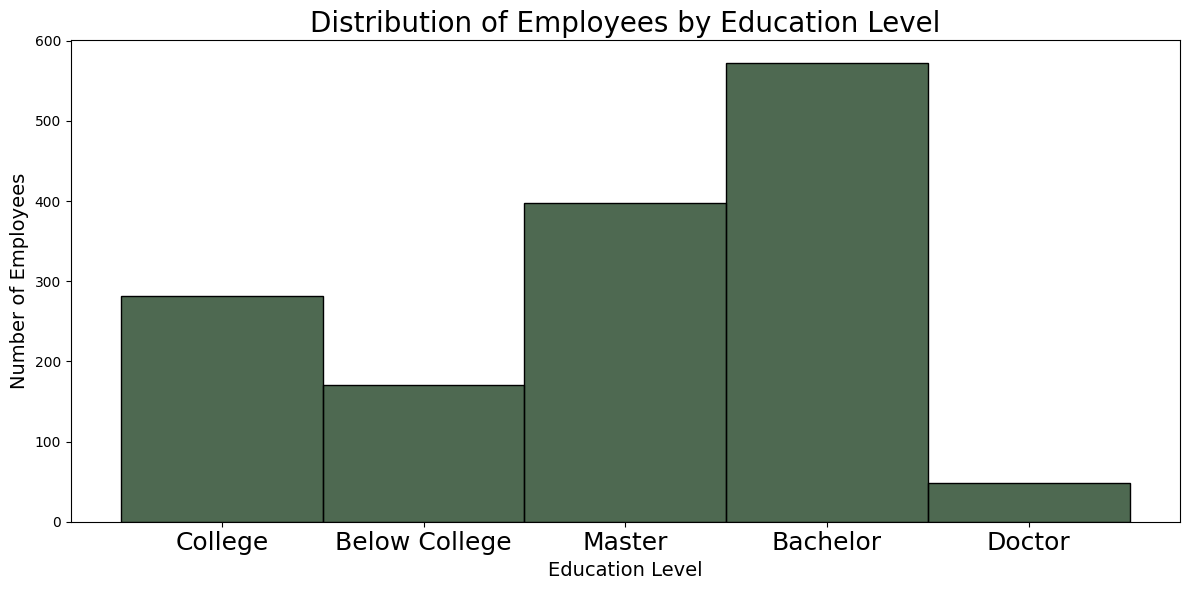

In [ ]:
# Plotting a histogram for Education
plt.figure(figsize=(12, 6))
sns.histplot(df['Education'], kde=False, bins=len(df['Education'].unique()), color='#133817', discrete=True, edgecolor='black')

# Add titles and labels
plt.title('Distribution of Employees by Education Level', fontsize=20)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Number of Employees', fontsize=14)

# Increase the font size of the education level names on the x-axis
plt.xticks(fontsize=18, rotation=0)  # Adjust font size and rotate for better readability

# Make the background of axes transparent
plt.gca().set_facecolor('none')  # Set axes background to transparent
plt.gcf().patch.set_alpha(0)  # Set figure background to transparent

# Display the plot
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

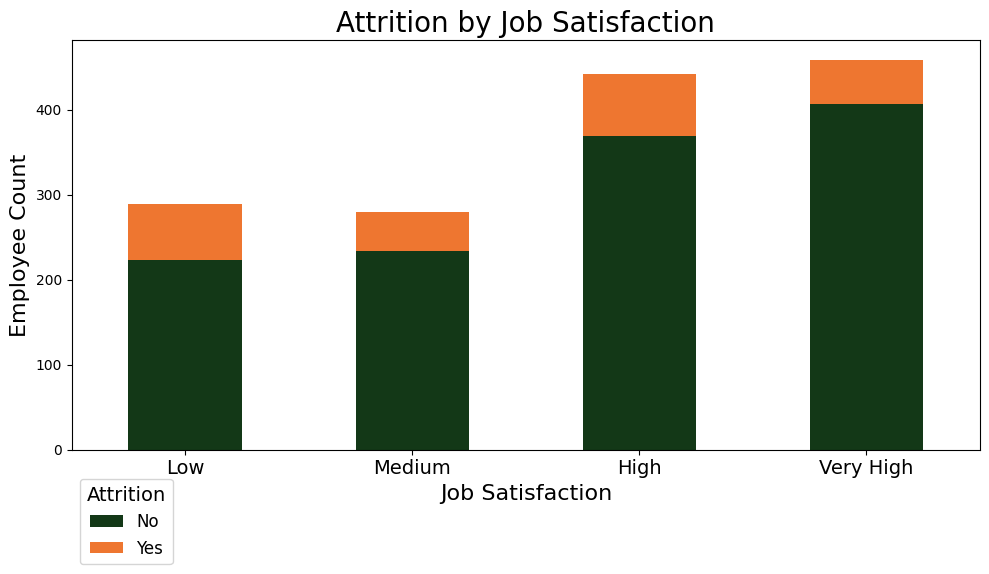

In [ ]:
# Count occurrences of 'Yes' and 'No' in 'Attrition' for each Job Satisfaction Level
attrition_counts = df.groupby(['JobSatisfaction', 'Attrition']).size().reset_index(name='Count')

# Calculate the total count of employees in each Job Satisfaction Level
total_counts = attrition_counts.groupby('JobSatisfaction')['Count'].transform('sum')

# Reorder the 'JobSatisfaction' column to have the correct order: Low, Medium, High, Very High
job_satisfaction_order = ['Low', 'Medium', 'High', 'Very High']
attrition_counts['JobSatisfaction'] = pd.Categorical(attrition_counts['JobSatisfaction'], categories=job_satisfaction_order, ordered=True)

# Pivot the data to get a structure suitable for a stacked bar chart
attrition_pivot = attrition_counts.pivot(index='JobSatisfaction', columns='Attrition', values='Count').fillna(0)

# Set up the plot
plt.figure(figsize=(10, 6), facecolor='none')

# Plot a stacked bar chart using employee count instead of percentage
attrition_pivot[['No', 'Yes']].plot(kind='bar', stacked=True, color=['#133817', '#ee7630'], figsize=(10, 6))

# Add title and labels with customized font sizes
plt.title('Attrition by Job Satisfaction', fontsize=20)
plt.xlabel('Job Satisfaction', fontsize=16)
plt.ylabel('Employee Count', fontsize=16)

# Set x-axis labels to horizontal
plt.xticks(rotation=0, fontsize=14)

# Move the legend to the bottom-left corner
plt.legend(title='Attrition', title_fontsize=14, fontsize=12, loc='lower left', bbox_to_anchor=(0, -0.3))

# Make the axes background transparent
plt.gca().set_facecolor('none')  # Set the chart area (axes) background to transparent
plt.gcf().patch.set_alpha(0)  # Set the figure background to transparent

# Display the plot
plt.tight_layout()
plt.show()


<ipython-input-57-912b5cdc23d8>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_counts = df.groupby(['JobSatisfaction', 'Attrition']).size().reset_index(name='Count')
<ipython-input-57-912b5cdc23d8>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = attrition_counts.groupby('JobSatisfaction')['Count'].transform('sum')
<ipython-input-57-912b5cdc23d8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

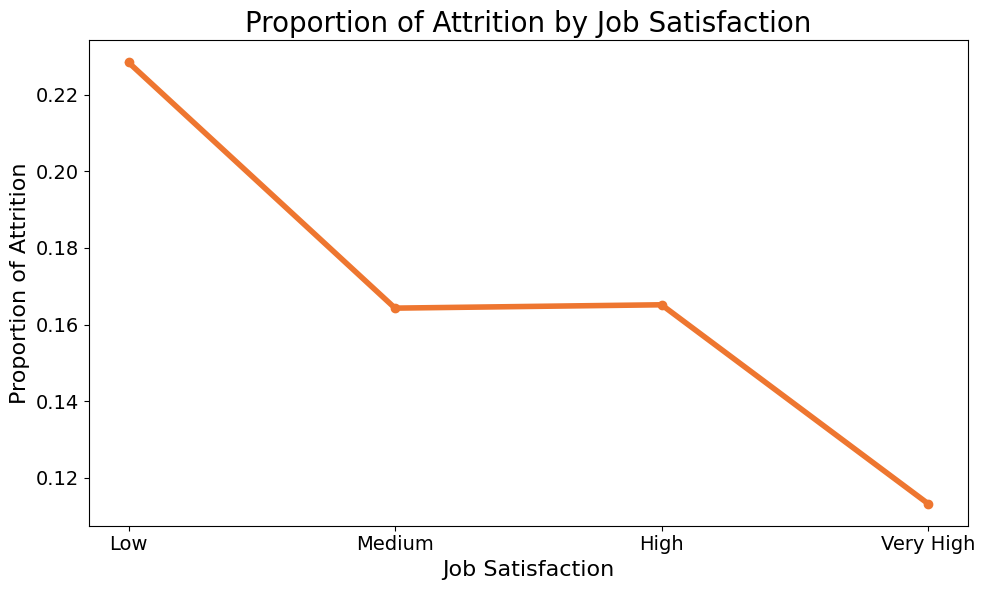

In [ ]:

# Count occurrences of 'Yes' and 'No' in 'Attrition' for each Job Satisfaction Level
attrition_counts = df.groupby(['JobSatisfaction', 'Attrition']).size().reset_index(name='Count')

# Calculate the total count of employees in each Job Satisfaction Level
total_counts = attrition_counts.groupby('JobSatisfaction')['Count'].transform('sum')

# Calculate the proportion of 'Yes' attrition for each Job Satisfaction level
attrition_counts['Proportion'] = attrition_counts['Count'] / total_counts

# Filter only the rows where Attrition is 'Yes'
attrition_yes = attrition_counts[attrition_counts['Attrition'] == 'Yes']

# Reorder the 'JobSatisfaction' column to have the correct order: Low, Medium, High, Very High
job_satisfaction_order = ['Low', 'Medium', 'High', 'Very High']
attrition_yes['JobSatisfaction'] = pd.Categorical(attrition_yes['JobSatisfaction'], categories=job_satisfaction_order, ordered=True)

# Sort by 'JobSatisfaction' to ensure correct plotting order
attrition_yes = attrition_yes.sort_values('JobSatisfaction')

# Set up the plot
plt.figure(figsize=(10, 6), facecolor='none')

# Plot a line graph showing the proportion of attrition ('Yes') across job satisfaction levels
plt.plot(attrition_yes['JobSatisfaction'], attrition_yes['Proportion'], marker='o', color='#ee7630', linewidth=4)

# Add title and labels with customized font sizes
plt.title('Proportion of Attrition by Job Satisfaction', fontsize=20)
plt.xlabel('Job Satisfaction', fontsize=16)
plt.ylabel('Proportion of Attrition', fontsize=16)

# Adjust tick font sizes
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)

# Make the axes background transparent
plt.gca().set_facecolor('none')  # Set the chart area (axes) background to transparent
plt.gcf().patch.set_alpha(0)  # Set the figure background to transparent

# Display the plot
plt.tight_layout()
plt.show()

<ipython-input-55-b51bdcb4a284>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_counts = df_attrition_yes.groupby('WorkLifeBalance').size().reset_index(name='Yes_Count')
<ipython-input-55-b51bdcb4a284>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = df.groupby('WorkLifeBalance').size().reset_index(name='Total_Count')


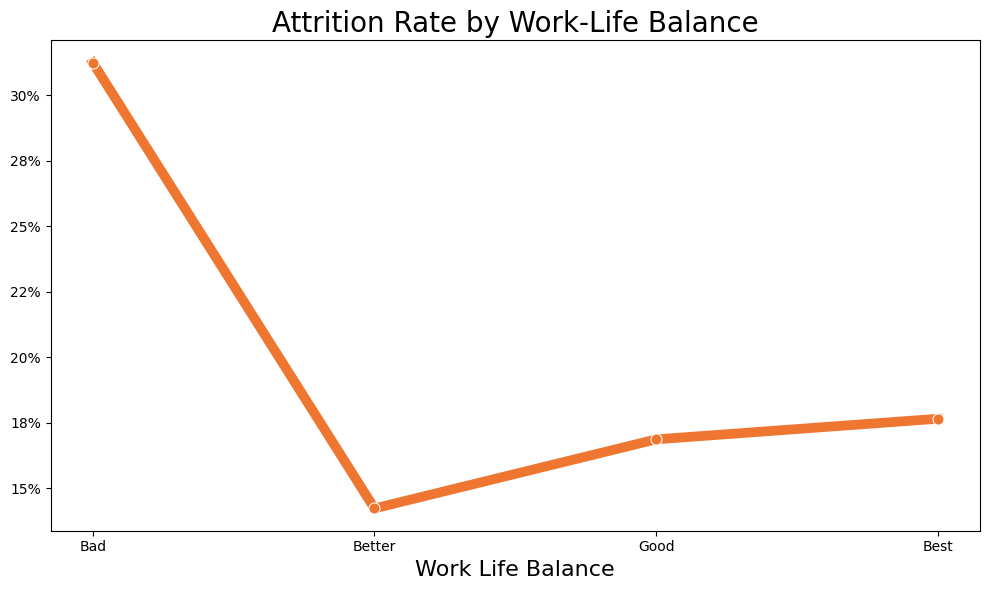

In [ ]:
# Filter the data to include only 'Attrition = Yes'
df_attrition_yes = df[df['Attrition'] == 'Yes']

# Group by 'WorkLifeBalance' and count occurrences for Attrition = Yes
attrition_counts = df_attrition_yes.groupby('WorkLifeBalance').size().reset_index(name='Yes_Count')

# Calculate the total count for each 'WorkLifeBalance' level
total_counts = df.groupby('WorkLifeBalance').size().reset_index(name='Total_Count')

# Merge the counts of Attrition = Yes with the total counts for each 'WorkLifeBalance' level
attrition_counts = pd.merge(attrition_counts, total_counts, on='WorkLifeBalance')

# Calculate the proportion of Attrition = Yes
attrition_counts['Proportion'] = (attrition_counts['Yes_Count'] / attrition_counts['Total_Count']) * 100

# Reorder the 'WorkLifeBalance' column to have the correct order: Bad, Good, Better, Best
work_life_balance_order = ['Bad', 'Better', 'Good', 'Best']
attrition_counts['WorkLifeBalance'] = pd.Categorical(attrition_counts['WorkLifeBalance'], categories=work_life_balance_order, ordered=True)

# Set up the plot with transparent background
plt.figure(figsize=(10, 6), facecolor='none')  # Transparent figure background

# Create a line plot with thicker line
sns.lineplot(x='WorkLifeBalance', y='Proportion', data=attrition_counts,
             markers=True, color='#ee7630', marker='o', markersize=8, linewidth=7)  # Thicker line (linewidth=7)

# Add title and labels
plt.title('Attrition Rate by Work-Life Balance', fontsize=20)
plt.xlabel('Work Life Balance', fontsize=16)
plt.ylabel('', fontsize=16)

# Format the y-axis to display as percentage (0 to 100 scale)
formatter = FuncFormatter(lambda y, _: f'{y:.0f}%')  # Format the y-axis labels as percentage
plt.gca().yaxis.set_major_formatter(formatter)  # Apply the formatter

# Make the background of axes transparent
plt.gca().set_facecolor('none')  # Set axes background to transparent
plt.gcf().patch.set_alpha(0)  # Set figure background to transparent

# Display the plot with tight layout
plt.tight_layout()

# Show the plot
plt.show()


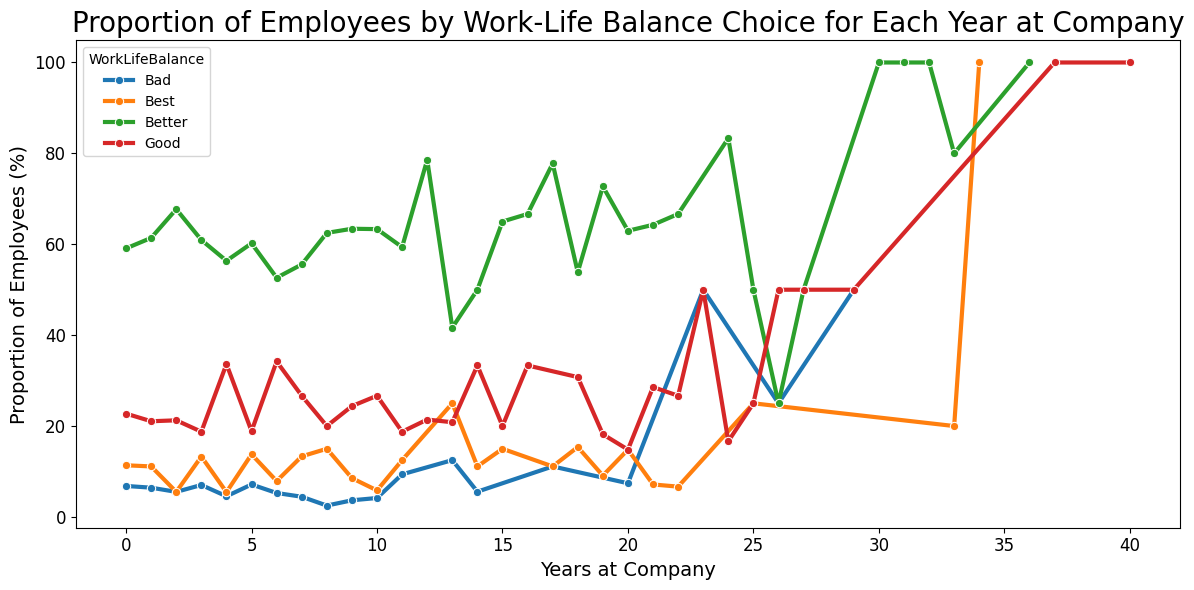

In [ ]:

# Group by 'YearsAtCompany' and 'WorkLifeBalance', and count occurrences for each combination
work_life_balance_counts = df.groupby(['YearsAtCompany', 'WorkLifeBalance']).size().reset_index(name='Count')

# Calculate the total number of employees for each 'YearsAtCompany'
total_counts = df.groupby('YearsAtCompany').size().reset_index(name='Total_Count')

# Merge the counts with the total counts for each 'YearsAtCompany'
work_life_balance_counts = pd.merge(work_life_balance_counts, total_counts, on='YearsAtCompany')

# Calculate the proportion of each 'WorkLifeBalance' choice for each 'YearsAtCompany'
work_life_balance_counts['Proportion'] = (work_life_balance_counts['Count'] / work_life_balance_counts['Total_Count']) * 100

# Set up the plot with transparent background
plt.figure(figsize=(12, 6), facecolor='none')  # Transparent figure background

# Plot the lines for each 'WorkLifeBalance' choice, showing the proportion of employees
sns.lineplot(x='YearsAtCompany', y='Proportion', hue='WorkLifeBalance', data=work_life_balance_counts,
             marker='o', linewidth=3)

# Add title and labels
plt.title('Proportion of Employees by Work-Life Balance Choice for Each Year at Company', fontsize=20)
plt.xlabel('Years at Company', fontsize=14)
plt.ylabel('Proportion of Employees (%)', fontsize=14)

# Set the x-axis label to show 'YearsAtCompany' and adjust font size
plt.xticks(fontsize=12)

# Set the y-axis label to show percentage
plt.yticks(fontsize=12)

# Make the background of axes transparent
plt.gca().set_facecolor('none')  # Set axes background to transparent
plt.gcf().patch.set_alpha(0)  # Set figure background to transparent

# Display the plot with tight layout
plt.tight_layout()

# Show the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

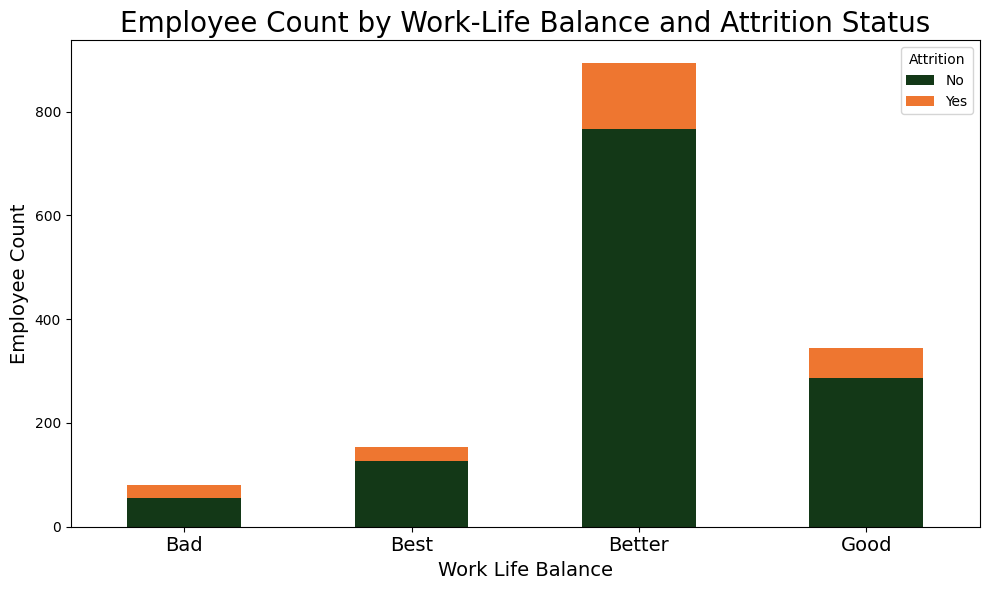

In [ ]:

# Assuming df is already loaded with your dataset

# Group by 'WorkLifeBalance' and 'Attrition', and count occurrences for each combination
attrition_counts = df.groupby(['WorkLifeBalance', 'Attrition']).size().reset_index(name='Count')

# Pivot the data to have separate columns for 'Yes' and 'No' attrition counts
attrition_pivot = attrition_counts.pivot(index='WorkLifeBalance', columns='Attrition', values='Count').fillna(0)

# Set up the plot with transparent background
plt.figure(figsize=(10, 6), facecolor='none')  # Transparent figure background

# Plot a stacked bar chart with reversed stack order: 'No' on top and 'Yes' at the bottom
attrition_pivot[['No', 'Yes']].plot(kind='bar', stacked=True, color=['#133817', '#ee7630'], figsize=(10, 6))

# Add title and labels
plt.title('Employee Count by Work-Life Balance and Attrition Status', fontsize=20)
plt.xlabel('Work Life Balance', fontsize=14)
plt.ylabel('Employee Count', fontsize=14)

# Set x-axis labels to horizontal
plt.xticks(rotation=0, fontsize=14)

# Make the background of axes transparent
plt.gca().set_facecolor('none')  # Set axes background to transparent
plt.gcf().patch.set_alpha(0)  # Set figure background to transparent

# Display the plot with tight layout
plt.tight_layout()

# Show the plot
plt.show()


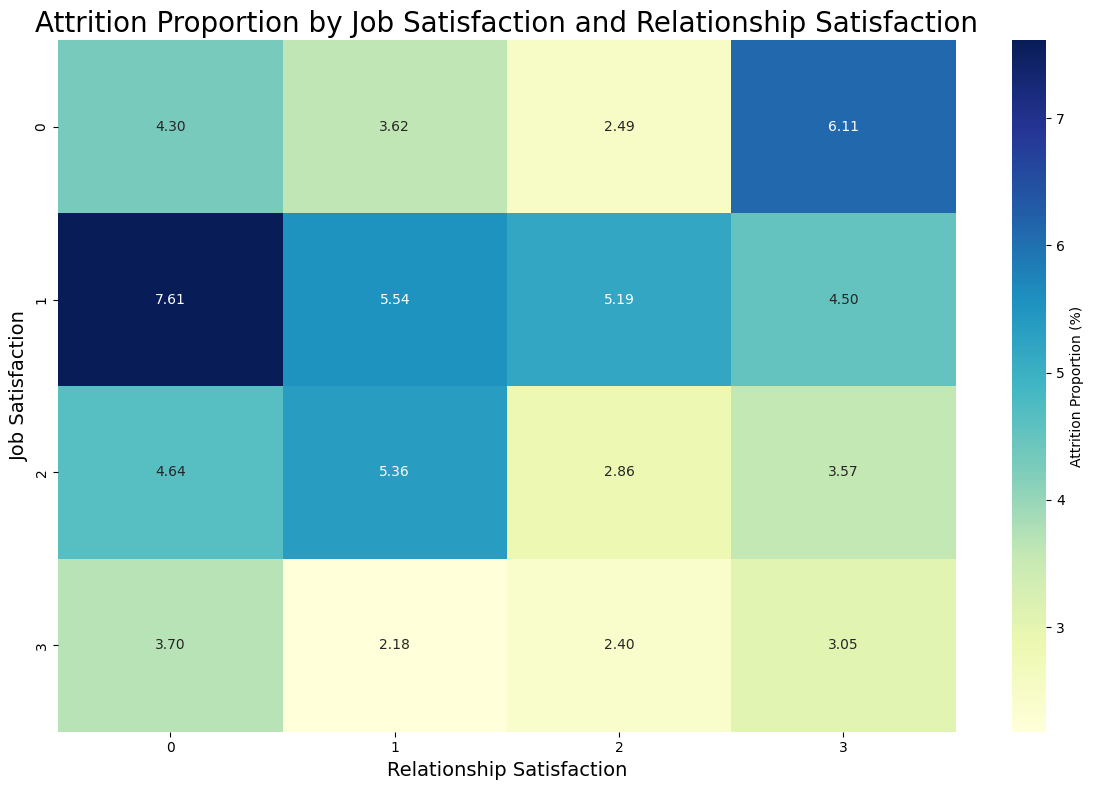

In [ ]:

# Group by 'JobSatisfaction' and 'RelationshipSatisfaction' and calculate the count of Attrition ('Yes' and 'No')
attrition_counts = df.groupby(['JobSatisfaction', 'RelationshipSatisfaction', 'Attrition']).size().reset_index(name='Count')

# Pivot the data to have 'JobSatisfaction' as rows and 'RelationshipSatisfaction' as columns
attrition_pivot = attrition_counts.pivot_table(index='JobSatisfaction', columns='RelationshipSatisfaction',
                                               values='Count', aggfunc='sum', fill_value=0)

# Calculate the count of employees who left (Attrition = 'Yes') for each combination
attrition_yes = df[df['Attrition'] == 'Yes'].groupby(['JobSatisfaction', 'RelationshipSatisfaction']).size().unstack(fill_value=0)

# Calculate attrition proportion by dividing the 'Yes' count by the total count for each combination
attrition_proportion = attrition_yes.values / attrition_pivot.sum(axis=1).values[:, None] * 100  # Use .values for broadcasting

# Set up the plot
plt.figure(figsize=(12, 8))

# Plot the heatmap
sns.heatmap(attrition_proportion, annot=True, fmt='.2f', cmap='YlGnBu', cbar_kws={'label': 'Attrition Proportion (%)'})

# Add title and labels
plt.title('Attrition Proportion by Job Satisfaction and Relationship Satisfaction', fontsize=20)
plt.xlabel('Relationship Satisfaction', fontsize=14)
plt.ylabel('Job Satisfaction', fontsize=14)

# Display the plot with tight layout
plt.tight_layout()

# Show the plot
plt.show()


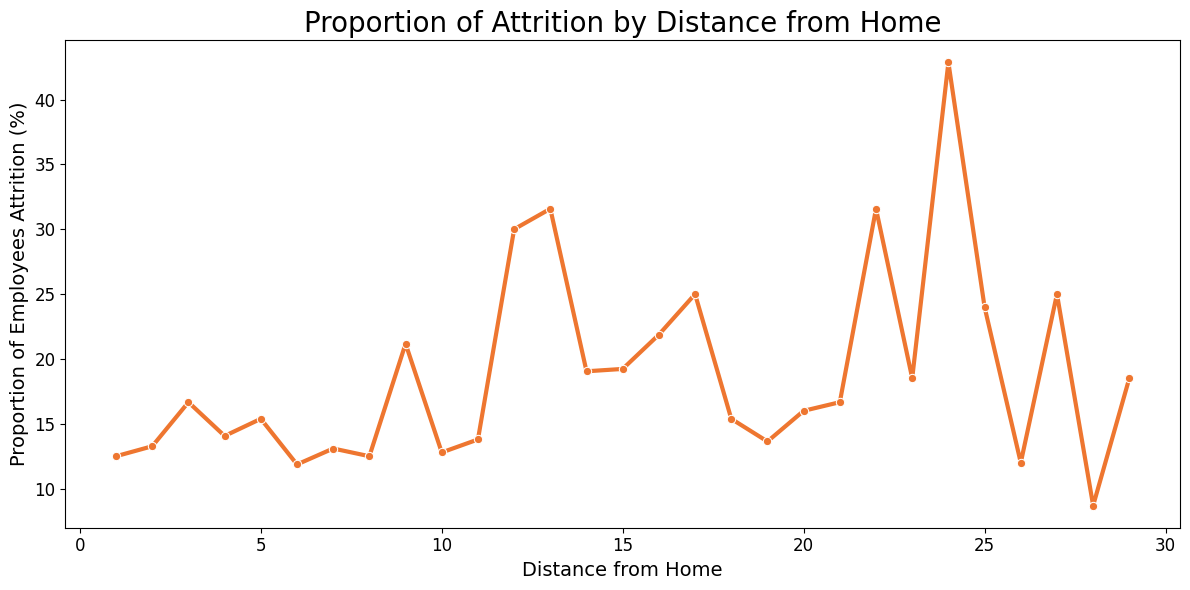

In [ ]:

# Filter the data to include only 'Attrition = Yes'
df_attrition_yes = df[df['Attrition'] == 'Yes']

# Group by 'DistanceFromHome' and 'Attrition', and count occurrences for each combination
attrition_counts = df_attrition_yes.groupby(['DistanceFromHome', 'Attrition']).size().reset_index(name='Count')

# Calculate the total number of employees for each 'DistanceFromHome'
total_counts = df.groupby('DistanceFromHome').size().reset_index(name='Total_Count')

# Merge the counts with the total counts for each 'DistanceFromHome'
attrition_counts = pd.merge(attrition_counts, total_counts, on='DistanceFromHome')

# Calculate the proportion of attrition for each 'DistanceFromHome'
attrition_counts['Proportion'] = (attrition_counts['Count'] / attrition_counts['Total_Count']) * 100

# Set up the plot with transparent background
plt.figure(figsize=(12, 6), facecolor='none')  # Transparent figure background

# Plot the line chart for Attrition Proportion by Distance from Home
sns.lineplot(x='DistanceFromHome', y='Proportion', data=attrition_counts,
             marker='o', color='#ee7630', linewidth=3)

# Add title and labels
plt.title('Proportion of Attrition by Distance from Home', fontsize=20)
plt.xlabel('Distance from Home', fontsize=14)
plt.ylabel('Proportion of Employees Attrition (%)', fontsize=14)

# Set the x-axis label to show 'DistanceFromHome' and adjust font size
plt.xticks(fontsize=12)

# Set the y-axis label to show percentage
plt.yticks(fontsize=12)

# Make the background of axes transparent
plt.gca().set_facecolor('none')  # Set axes background to transparent
plt.gcf().patch.set_alpha(0)  # Set figure background to transparent

# Display the plot with tight layout
plt.tight_layout()

# Show the plot
plt.show()


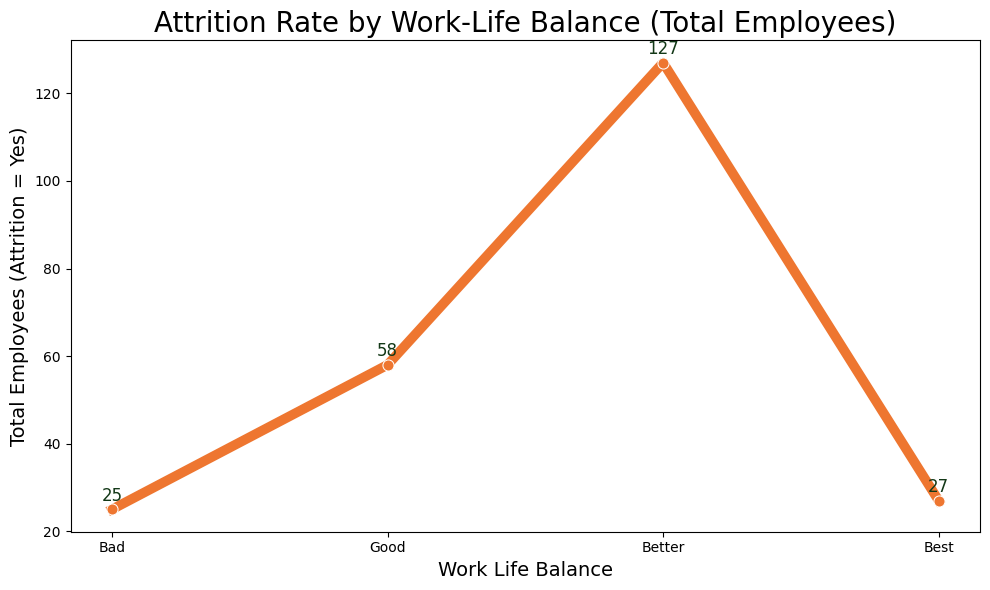

In [ ]:
# Filter the data to include only 'Attrition = Yes'
df_attrition_yes = df[df['Attrition'] == 'Yes']

# Group by 'WorkLifeBalance' and count occurrences for Attrition = Yes
attrition_counts = df_attrition_yes.groupby('WorkLifeBalance').size().reset_index(name='Yes_Count')

# Calculate the total count for each 'WorkLifeBalance' level
total_counts = df.groupby('WorkLifeBalance').size().reset_index(name='Total_Count')

# Merge the counts of Attrition = Yes with the total counts for each 'WorkLifeBalance' level
attrition_counts = pd.merge(attrition_counts, total_counts, on='WorkLifeBalance')

# Reorder the 'WorkLifeBalance' column to have the correct order: Bad, Good, Better, Best
work_life_balance_order = ['Bad', 'Good', 'Better', 'Best']
attrition_counts['WorkLifeBalance'] = pd.Categorical(attrition_counts['WorkLifeBalance'], categories=work_life_balance_order, ordered=True)

# Set up the plot with transparent background
plt.figure(figsize=(10, 6), facecolor='none')  # Transparent figure background

# Create a line plot with actual number of employees (Yes_Count) on the y-axis
sns.lineplot(x='WorkLifeBalance', y='Yes_Count', data=attrition_counts,
             markers=True, color='#ee7630', marker='o', markersize=8, linewidth=7)  # Thicker line (linewidth=7)

# Add title and labels
plt.title('Attrition Rate by Work-Life Balance (Total Employees)', fontsize=20)
plt.xlabel('Work Life Balance', fontsize=14)
plt.ylabel('Total Employees (Attrition = Yes)', fontsize=14)

# Annotate each point with the actual number of employees
for i, row in attrition_counts.iterrows():
    plt.text(row['WorkLifeBalance'], row['Yes_Count'] + 1, f'{row["Yes_Count"]}',
             horizontalalignment='center', verticalalignment='bottom', fontsize=12, color='#133817')

# Make the background of axes transparent
plt.gca().set_facecolor('none')  # Set axes background to transparent
plt.gcf().patch.set_alpha(0)  # Set figure background to transparent

# Display the plot with tight layout
plt.tight_layout()

# Show the plot
plt.show()

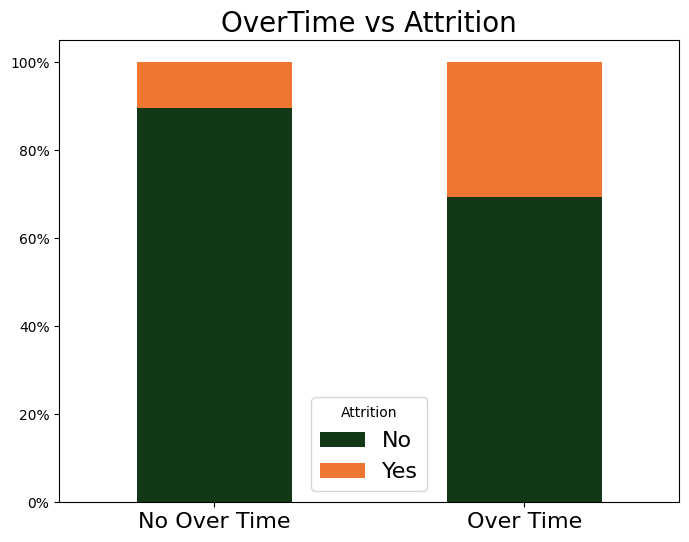

In [ ]:
# Create a crosstab to get the counts of Attrition (Yes/No) for each OverTime category
overtime_attrition = pd.crosstab(df['OverTime'], df['Attrition'])

# Normalize the crosstab to show proportions
overtime_attrition_proportion = overtime_attrition.div(overtime_attrition.sum(1), axis=0)

# Create a stacked bar chart to visualize the proportions
overtime_attrition_proportion.plot(kind='bar', stacked=True, color=['#133817', '#ee7630'], figsize=(8,6))

# Customize the plot

plt.title('OverTime vs Attrition', fontsize=20)  # Title font size set to 20
plt.xlabel('', fontsize=14)  # X-axis label font size set to 14
plt.ylabel('', fontsize=14)  # Y-axis label font size set to 14
plt.xticks(rotation=0)
plt.legend(title="Attrition", labels=["No", "Yes"], fontsize = 16)  # Legend font size set to
plt.xticks([0, 1], ['No Over Time', 'Over Time'], fontsize = 16)  # Change 'No' to 'No Over Time' and 'Yes' to 'Over Time'


# Format the y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))  # 'xmax=1' tells PercentFormatter that the values are between 0 and 1

# Make the background of axes transparent
plt.gca().set_facecolor('none')  # Set axes background to transparent
plt.gcf().patch.set_alpha(0)  # Set figure background to transparent

# Show the plot
plt.show()

<ipython-input-29-069515437cec>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_counts = df.groupby(['DailyRateGroup', 'Attrition']).size().unstack(fill_value=0).reset_index()


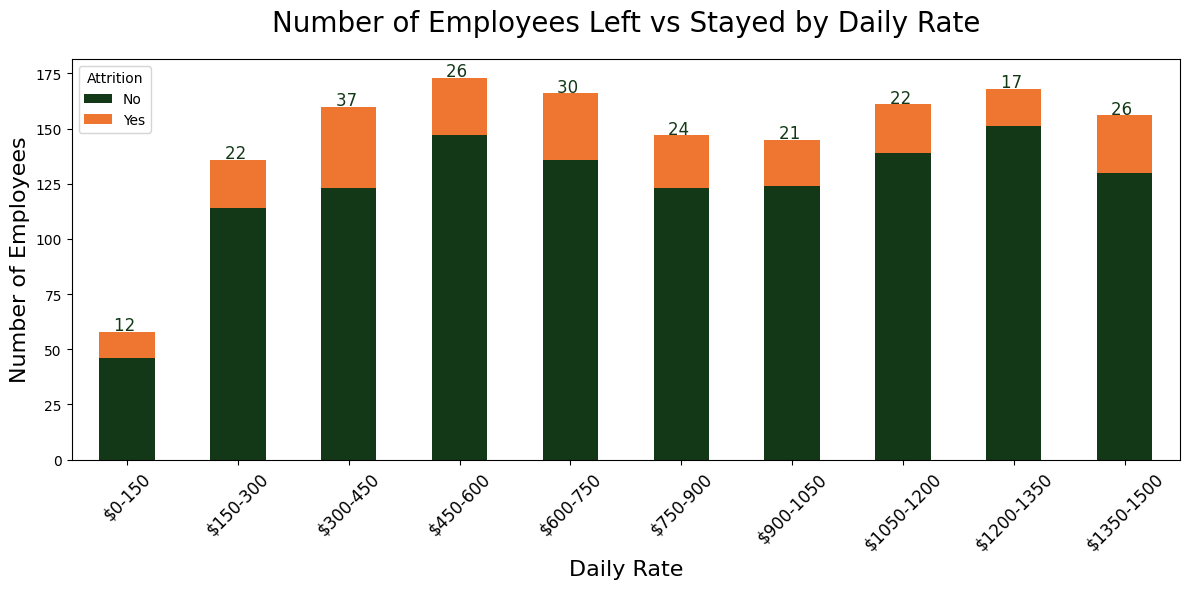

In [ ]:
# Create 10 bins for DailyRate with a maximum value of 1500
bins = [i * 150 for i in range(11)]  # Creates bins from 0 to 1500 with an interval of 150
labels = [f'${i*150}-{(i+1)*150}' for i in range(10)]  # Labels for the bins: $0-$150, $151-$300, ..., $1351-$1500
df['DailyRateGroup'] = pd.cut(df['DailyRate'], bins=bins, labels=labels, right=False)

# Count occurrences of 'Yes' and 'No' in 'Attrition' for each 'DailyRateGroup'
attrition_counts = df.groupby(['DailyRateGroup', 'Attrition']).size().unstack(fill_value=0).reset_index()

# Set up the plot with transparent background
plt.figure(figsize=(12, 6), facecolor='none')  # Adjusted figsize with default height

# Plot a stacked bar graph for the number of employees who left and stayed for each DailyRate bin
ax = attrition_counts.set_index('DailyRateGroup').plot(kind='bar', stacked=True, color=['#133817', '#ee7630'], ax=plt.gca())

# Add title and labels
plt.title('Number of Employees Left vs Stayed by Daily Rate', fontsize=20, pad=20)  # Title with padding
plt.xlabel('Daily Rate', fontsize=16)
plt.ylabel('Number of Employees', fontsize=16)

# Annotate each bar with the number of employees who left (Attrition = Yes) and "Employees Left"
for i, row in attrition_counts.iterrows():
    yes_count = row['Yes']
    total_height = row['Yes'] + row['No']  # Total height of the bar
    plt.text(i, total_height + 0.7, f'{yes_count} ',
             horizontalalignment='center', fontsize=12, color='#133817')

# Format the x-axis labels
plt.xticks(rotation=45, fontsize=12)

# Increase space at the top to give more room for the title and labels
plt.subplots_adjust(top=50)  # Adjust the top margin to create more space for the title

# Make the background of axes transparent
plt.gca().set_facecolor('none')  # Set axes background to transparent
plt.gcf().patch.set_alpha(0)  # Set figure background to transparent

# Display the plot
plt.tight_layout()
plt.show()

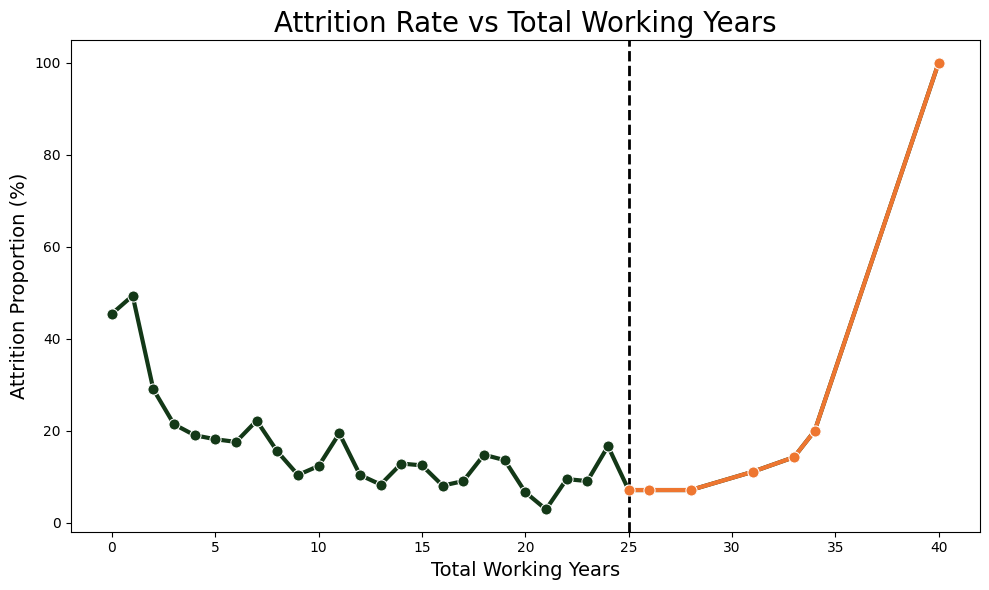

In [ ]:
# Filter the data to include only 'Attrition = Yes'
df_attrition_yes = df[df['Attrition'] == 'Yes']

# Group by 'TotalWorkingYears' and count occurrences for Attrition = Yes
attrition_counts = df_attrition_yes.groupby('TotalWorkingYears').size().reset_index(name='Yes_Count')

# Calculate the total count for each 'TotalWorkingYears' level
total_counts = df.groupby('TotalWorkingYears').size().reset_index(name='Total_Count')

# Merge the counts of Attrition = Yes with the total counts for each 'TotalWorkingYears' level
attrition_counts = pd.merge(attrition_counts, total_counts, on='TotalWorkingYears')

# Calculate the proportion of Attrition = Yes
attrition_counts['Proportion'] = (attrition_counts['Yes_Count'] / attrition_counts['Total_Count']) * 100

# Set up the plot with transparent background
plt.figure(figsize=(10, 6), facecolor='none')  # Transparent figure background

# Create the line plot for the entire data set
sns.lineplot(x='TotalWorkingYears', y='Proportion', data=attrition_counts,
             marker='o', markersize=8, linewidth=3, color='#133817')

# Highlight the 25-year mark with a color change
plt.axvline(x=25, color='black', linestyle='--', linewidth=2)  # Add a vertical line at the 25-year mark

# Create the line again with different color after 25 years (using plot directly to overwrite the color)
sns.lineplot(x=attrition_counts[attrition_counts['TotalWorkingYears'] >= 25]['TotalWorkingYears'],
             y=attrition_counts[attrition_counts['TotalWorkingYears'] >= 25]['Proportion'],
             color='#ee7630', marker='o', markersize=8, linewidth=3)  # Color after 25 years

# Customize the plot
plt.title('Attrition Rate vs Total Working Years', fontsize=20)  # Title font size set to 20
plt.xlabel('Total Working Years', fontsize=14)  # X-axis label font size set to 14
plt.ylabel('Attrition Proportion (%)', fontsize=14)  # Y-axis label font size set to 14

# Make the background of axes transparent
plt.gca().set_facecolor('none')  # Set axes background to transparent
plt.gcf().patch.set_alpha(0)  # Set figure background to transparent

# Display the plot
plt.tight_layout()
plt.show()


<ipython-input-31-35102c581584>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_rate = df.groupby(['WorkLifeBalance', 'JobSatisfaction'])['Attrition'].value_counts(normalize=True).unstack().fillna(0)


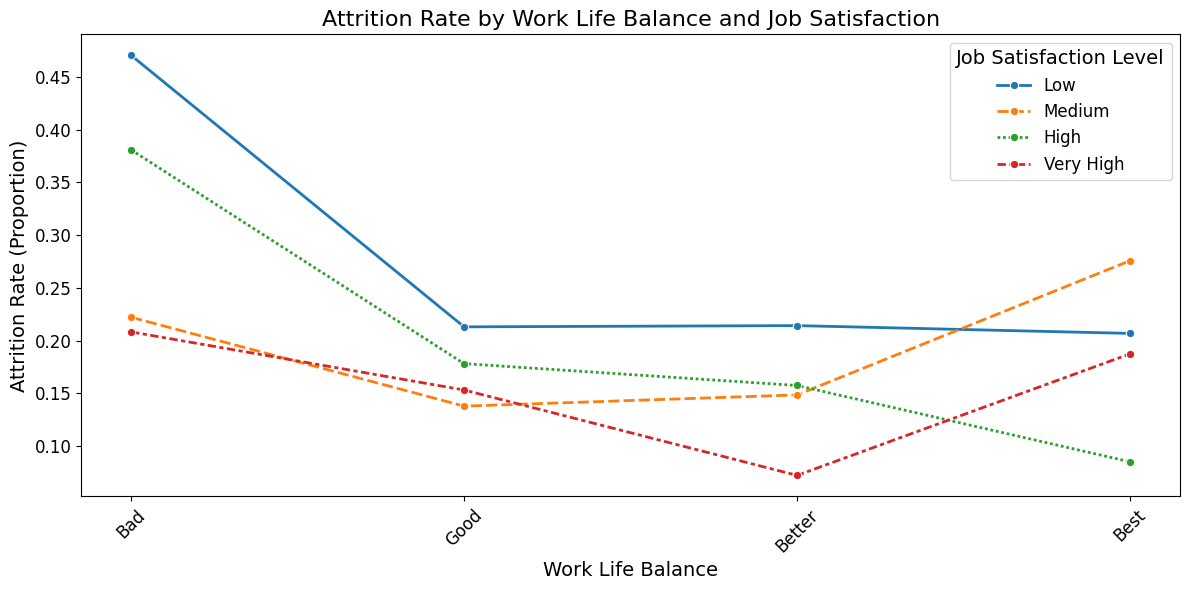

In [ ]:

# Reorder the WorkLifeBalance column
work_life_balance_order = ['Bad', 'Good', 'Better', 'Best']
df['WorkLifeBalance'] = pd.Categorical(df['WorkLifeBalance'], categories=work_life_balance_order, ordered=True)

# Reorder the JobSatisfaction column
job_satisfaction_order = ['Low', 'Medium', 'High', 'Very High']
df['JobSatisfaction'] = pd.Categorical(df['JobSatisfaction'], categories=job_satisfaction_order, ordered=True)

# Calculate the proportion of attrition ('Yes') for each combination of WorkLifeBalance and JobSatisfaction
attrition_rate = df.groupby(['WorkLifeBalance', 'JobSatisfaction'])['Attrition'].value_counts(normalize=True).unstack().fillna(0)

# Now let's plot the proportion of 'Yes' attrition
attrition_rate = attrition_rate['Yes']

# Plot the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=attrition_rate.unstack(), marker='o', linewidth=2)

# Add titles and labels
plt.title('Attrition Rate by Work Life Balance and Job Satisfaction', fontsize=16)
plt.xlabel('Work Life Balance', fontsize=14)
plt.ylabel('Attrition Rate (Proportion)', fontsize=14)

# Set labels for the x-axis (Work Life Balance levels) and y-axis
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(title='Job Satisfaction Level', title_fontsize=14, fontsize=12)
plt.tight_layout()
plt.show()

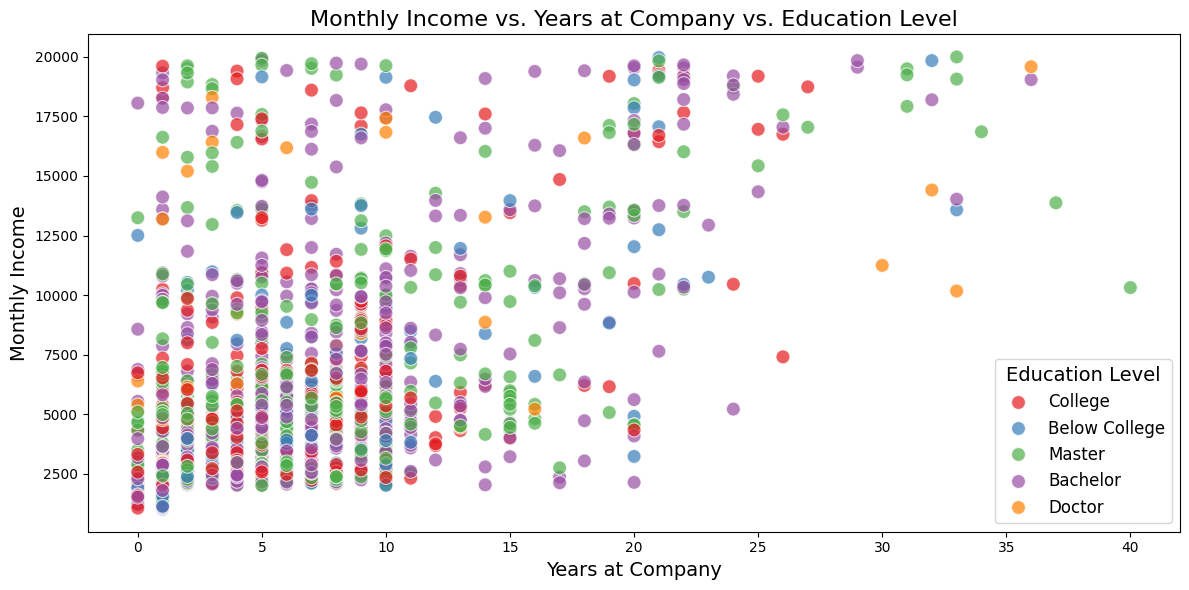

In [ ]:

# Scatter plot for Monthly Income vs. Years at Company vs. Education Level
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='YearsAtCompany', y='MonthlyIncome', hue='Education', palette='Set1', s=100, alpha=0.7)

# Add titles and labels
plt.title('Monthly Income vs. Years at Company vs. Education Level', fontsize=16)
plt.xlabel('Years at Company', fontsize=14)
plt.ylabel('Monthly Income', fontsize=14)

# Customize the legend
plt.legend(title='Education Level', title_fontsize=14, fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

<ipython-input-41-bc93a829c8e8>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_annual_income_education = df.groupby('Education')['AnnualIncome'].mean().reset_index()


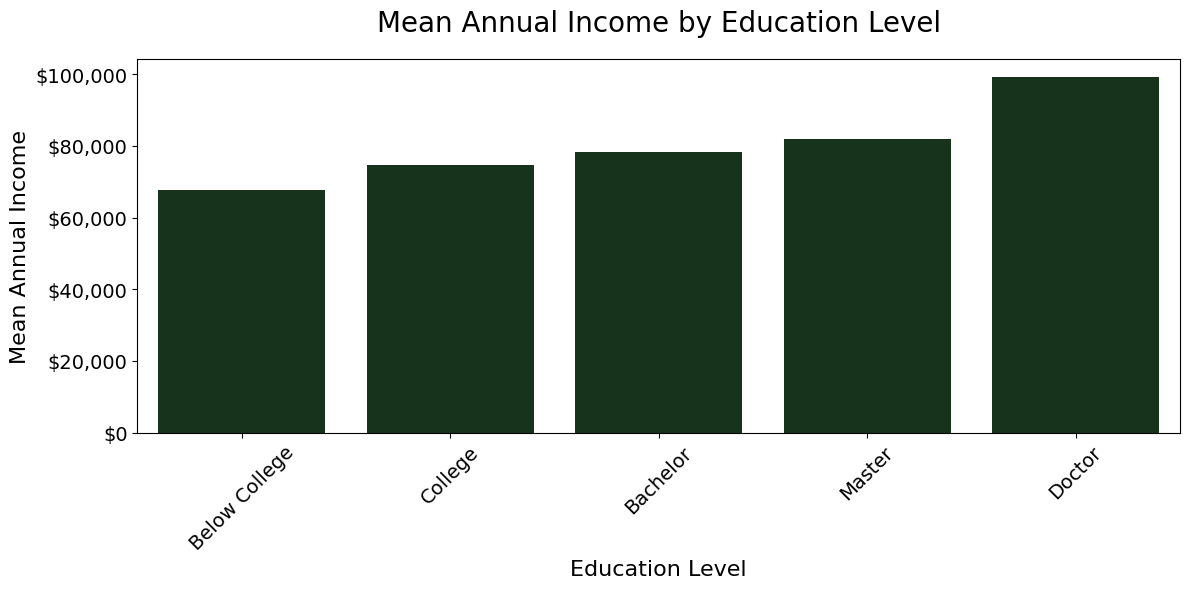

In [ ]:
# Calculate Annual Income by multiplying Monthly Income by 12
df['AnnualIncome'] = df['MonthlyIncome'] * 12

# Define the custom order for education levels
education_order = ['Below College', 'College', 'Bachelor', 'Master', 'Doctor']

# Convert the 'Education' column to a categorical type with the specified order
df['Education'] = pd.Categorical(df['Education'], categories=education_order, ordered=True)

# Calculate the mean Annual Income for each Education Level
mean_annual_income_education = df.groupby('Education')['AnnualIncome'].mean().reset_index()

# Plotting the bar chart with transparent background
plt.figure(figsize=(12, 6), facecolor='none')  # Set figure background to transparent

# Create the bar plot for mean annual income by education level
sns.barplot(data=mean_annual_income_education, x='Education', y='AnnualIncome', color='#133817')

# Add titles and labels with larger font sizes
plt.title('Mean Annual Income by Education Level', fontsize=20, pad=20)  # Title with padding
plt.xlabel('Education Level', fontsize=16)  # Larger x-axis label
plt.ylabel('Mean Annual Income', fontsize=16)  # Larger y-axis label with units

# Format y-axis as US dollars
formatter = FuncFormatter(lambda x, pos: f'${x:,.0f}')  # Format as US dollars
plt.gca().yaxis.set_major_formatter(formatter)  # Apply formatter to y-axis

# Adjust tick font sizes
plt.xticks(rotation=45, fontsize=14)  # Larger x-axis tick font size with angle for readability
plt.yticks(fontsize=14)  # Larger y-axis tick font size

# Make the background of axes transparent
plt.gca().set_facecolor('none')  # Set axes background to transparent
plt.gcf().patch.set_alpha(0)  # Set figure background to transparent

# Display the plot with tight layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

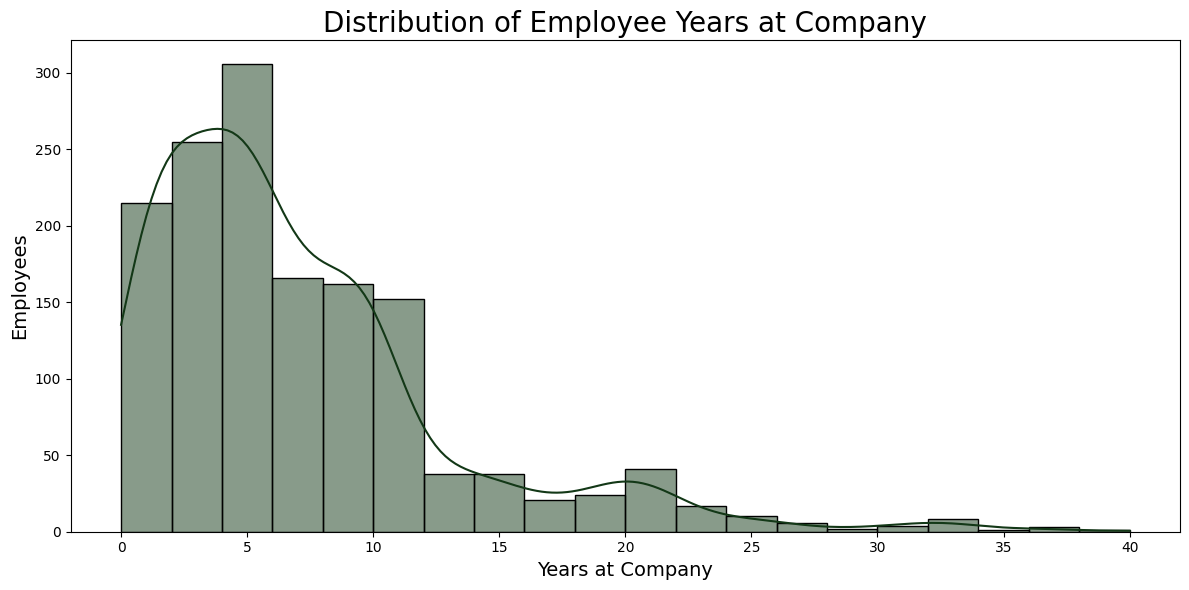

In [ ]:
# Plotting the histogram for Years at Company
plt.figure(figsize=(12, 6))
hist = sns.histplot(df['YearsAtCompany'], kde=True, bins=20, color='#133817', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Employee Years at Company', fontsize=20)
plt.xlabel('Years at Company', fontsize=14)
plt.ylabel('Employees', fontsize=14)



# Make the background of axes transparent
plt.gca().set_facecolor('none')  # Set axes background to transparent
plt.gcf().patch.set_alpha(0)  # Set figure background to transparent

# Display the plot
plt.tight_layout()
plt.show()

<ipython-input-53-cfddeba636a0>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_counts = df.groupby(['TrainingTimesGroup', 'Attrition']).size().unstack(fill_value=0).reset_index()


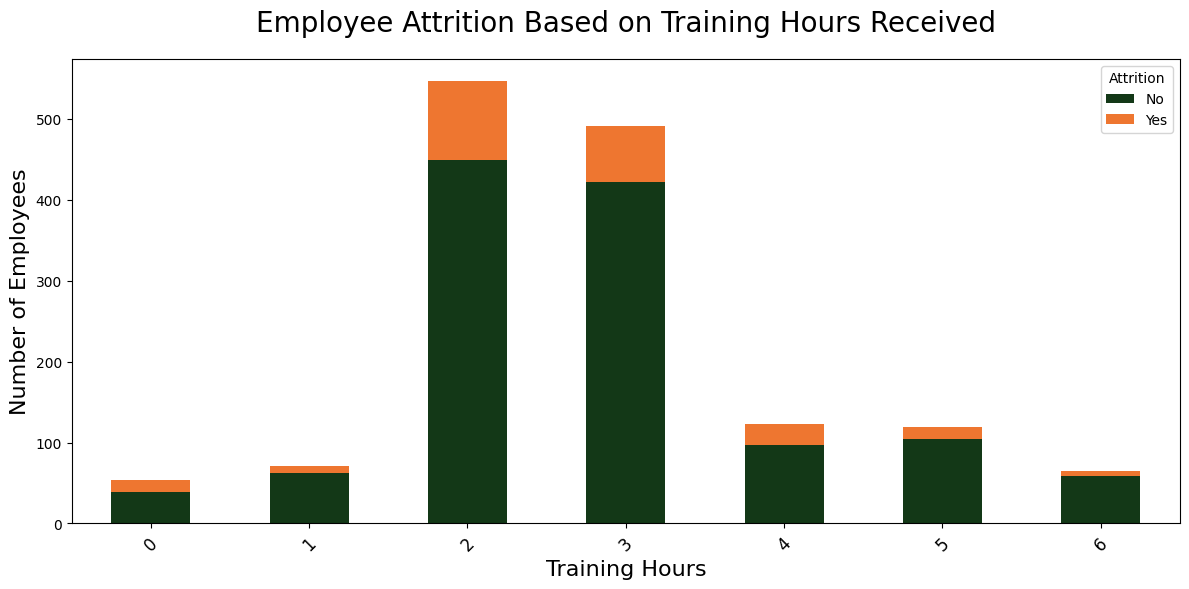

In [ ]:
# Assuming df is already loaded with your dataset

# Create bins for 'TrainingTimesLastYear' (0 to 6 hours range for the labels)
bins = [i for i in range(0, 8)]  # Creating bins from 0 to 6 (0-1, 1-2, ..., 6-7)
labels = [str(i) for i in range(0, 7)]  # Labels for 0, 1, 2, ..., 6
df['TrainingTimesGroup'] = pd.cut(df['TrainingTimesLastYear'], bins=bins, labels=labels, right=False)

# Count occurrences of 'Yes' and 'No' in 'Attrition' for each 'TrainingTimesGroup'
attrition_counts = df.groupby(['TrainingTimesGroup', 'Attrition']).size().unstack(fill_value=0).reset_index()

# Set up the plot with transparent background
plt.figure(figsize=(12, 6), facecolor='none')  # Adjusted figsize with default height

# Plot a stacked bar graph for the number of employees who left (Yes) vs stayed (No) for each TrainingTimesGroup
# Change the order of stacking: now 'No' (stayed) is on top of 'Yes' (attrition)
attrition_counts.set_index('TrainingTimesGroup')[['No', 'Yes']].plot(kind='bar', stacked=True,
                                                                    color=['#133817', '#ee7630'], ax=plt.gca())

# Add title and labels
plt.title('Employee Attrition Based on Training Hours Received', fontsize=20, pad=20)  # Title with padding
plt.xlabel('Training Hours', fontsize=16)
plt.ylabel('Number of Employees', fontsize=16)

# Format the x-axis labels to show numbers 0 to 6
plt.xticks(ticks=range(7), labels=labels, rotation=45, fontsize=12)

# Make the background of axes transparent
plt.gca().set_facecolor('none')  # Set axes background to transparent
plt.gcf().patch.set_alpha(0)  # Set figure background to transparent

# Display the plot
plt.tight_layout()
plt.show()


<ipython-input-54-0a0b097c0ec0>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_counts = df.groupby(['TrainingTimesGroup', 'Attrition']).size().unstack(fill_value=0).reset_index()


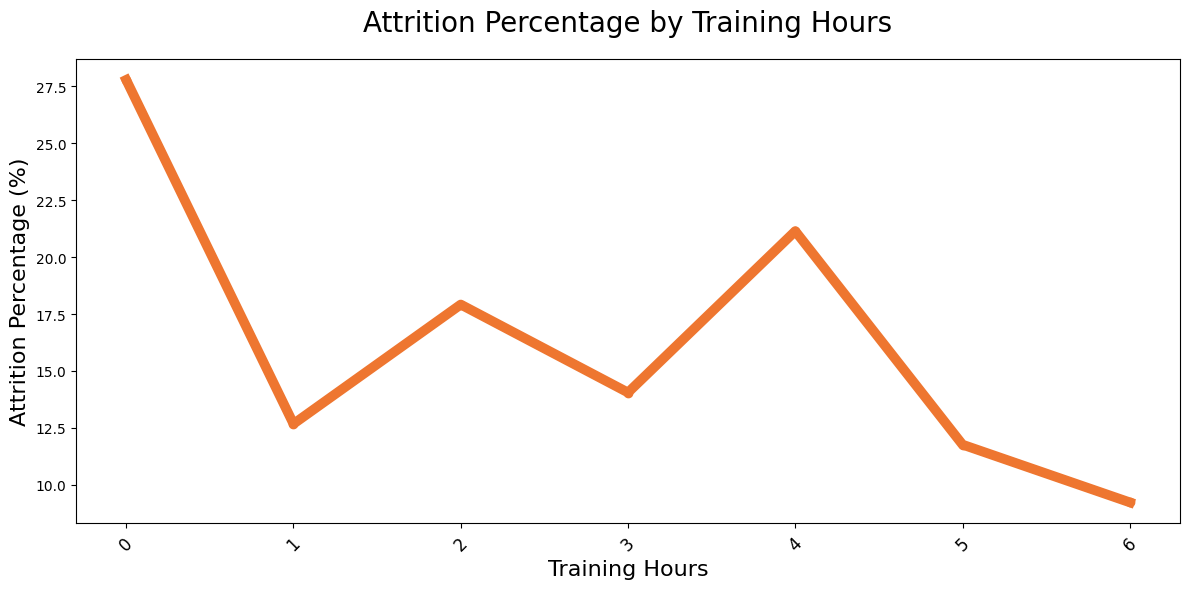

In [ ]:
# Assuming df is already loaded with your dataset

# Create bins for 'TrainingTimesLastYear' (0 to 6 hours range for the labels)
bins = [i for i in range(0, 8)]  # Creating bins from 0 to 6 (0-1, 1-2, ..., 6-7)
labels = [str(i) for i in range(0, 7)]  # Labels for 0, 1, 2, ..., 6
df['TrainingTimesGroup'] = pd.cut(df['TrainingTimesLastYear'], bins=bins, labels=labels, right=False)

# Count occurrences of 'Yes' and 'No' in 'Attrition' for each 'TrainingTimesGroup'
attrition_counts = df.groupby(['TrainingTimesGroup', 'Attrition']).size().unstack(fill_value=0).reset_index()

# Calculate the total count for each 'TrainingTimesGroup'
attrition_counts['Total'] = attrition_counts['Yes'] + attrition_counts['No']

# Calculate the percentage of 'Yes' (attrition) for each 'TrainingTimesGroup'
attrition_counts['AttritionPercent'] = (attrition_counts['Yes'] / attrition_counts['Total']) * 100

# Set up the plot with transparent background
plt.figure(figsize=(12, 6), facecolor='none')  # Adjusted figsize with default height

# Plot the line graph showing the percent of attrition for each 'TrainingTimesGroup'
# Increase line width to 7 by setting 'linewidth'
plt.plot(attrition_counts['TrainingTimesGroup'], attrition_counts['AttritionPercent'], marker='o', color='#ee7630',
         label='Attrition Percentage', linewidth=7)

# Add title and labels
plt.title('Attrition Percentage by Training Hours', fontsize=20, pad=20)
plt.xlabel('Training Hours', fontsize=16)
plt.ylabel('Attrition Percentage (%)', fontsize=16)

# Format the x-axis labels to show numbers 0 to 6
plt.xticks(ticks=range(7), labels=labels, rotation=45, fontsize=12)

# Make the background of axes transparent
plt.gca().set_facecolor('none')  # Set axes background to transparent
plt.gcf().patch.set_alpha(0)  # Set figure background to transparent

# Display the plot
plt.tight_layout()
plt.show()


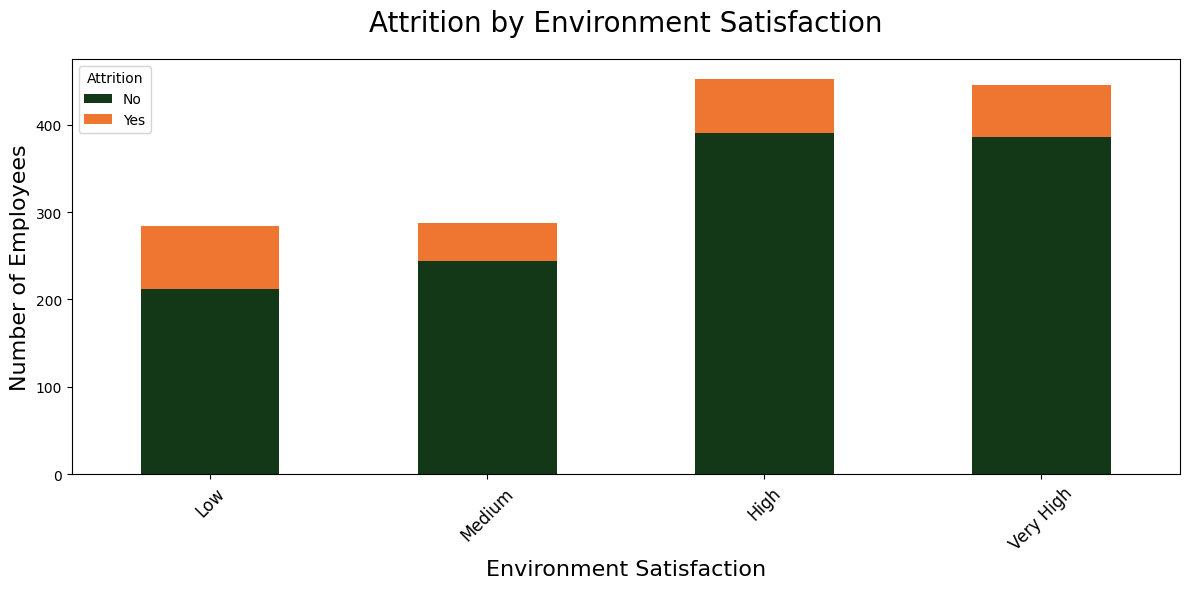

In [ ]:
# Assuming df is already loaded with your dataset

# Count occurrences of 'Yes' and 'No' in 'Attrition' for each 'EnvironmentSatisfaction' level
attrition_counts = df.groupby(['EnvironmentSatisfaction', 'Attrition']).size().unstack(fill_value=0).reset_index()

# Define a custom order for the EnvironmentSatisfaction levels
custom_order = ['Low', 'Medium', 'High', 'Very High']

# Ensure the EnvironmentSatisfaction is ordered according to the custom order
attrition_counts['EnvironmentSatisfaction'] = pd.Categorical(attrition_counts['EnvironmentSatisfaction'], categories=custom_order, ordered=True)

# Sort the values based on the custom order
attrition_counts = attrition_counts.sort_values(by='EnvironmentSatisfaction')

# Set up the plot with transparent background
plt.figure(figsize=(12, 6), facecolor='none')  # Adjusted figsize with default height

# Plot a stacked bar graph for the number of employees who left (Yes) vs stayed (No) for each 'EnvironmentSatisfaction' group
# 'No' (stayed) is on top of 'Yes' (attrition)
attrition_counts.set_index('EnvironmentSatisfaction')[['No', 'Yes']].plot(kind='bar', stacked=True,
                                                                            color=['#133817', '#ee7630'], ax=plt.gca())

# Add title and labels
plt.title('Attrition by Environment Satisfaction', fontsize=20, pad=20)  # Title with padding
plt.xlabel('Environment Satisfaction', fontsize=16)
plt.ylabel('Number of Employees', fontsize=16)

# Format the x-axis labels to show the custom ordered EnvironmentSatisfaction levels
plt.xticks(ticks=range(len(custom_order)), labels=custom_order, rotation=45, fontsize=12)

# Make the background of axes transparent
plt.gca().set_facecolor('none')  # Set axes background to transparent
plt.gcf().patch.set_alpha(0)  # Set figure background to transparent

# Display the plot
plt.tight_layout()
plt.show()


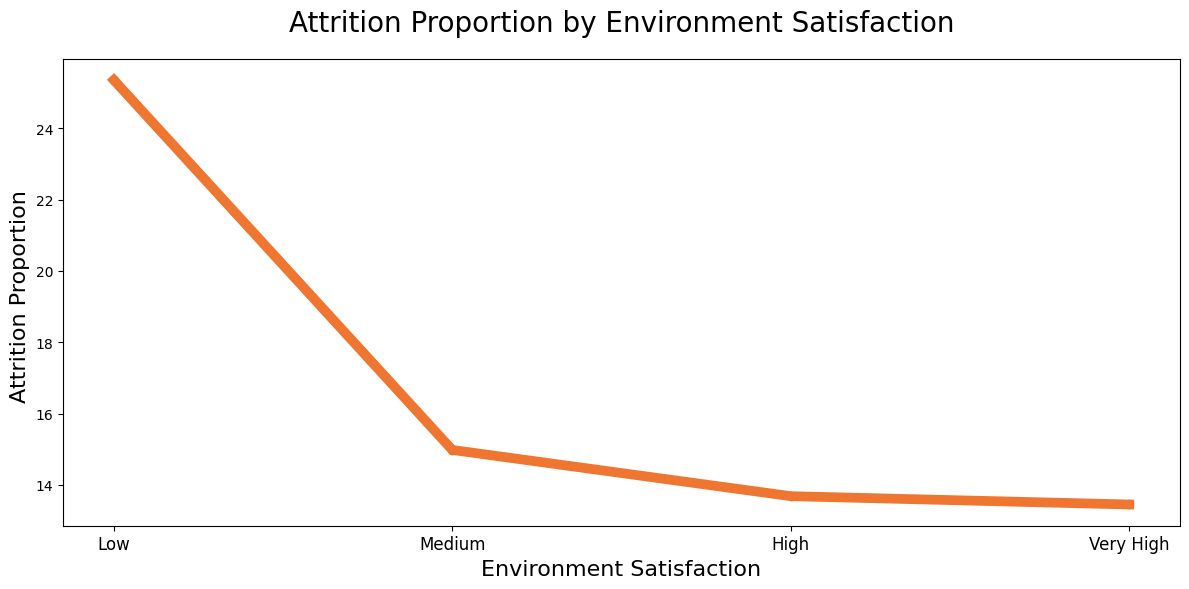

In [ ]:
# Assuming df is already loaded with your dataset

# Count occurrences of 'Yes' and 'No' in 'Attrition' for each 'EnvironmentSatisfaction' level
attrition_counts = df.groupby(['EnvironmentSatisfaction', 'Attrition']).size().unstack(fill_value=0).reset_index()

# Define a custom order for the EnvironmentSatisfaction levels
custom_order = ['Low', 'Medium', 'High', 'Very High']

# Ensure the EnvironmentSatisfaction is ordered according to the custom order
attrition_counts['EnvironmentSatisfaction'] = pd.Categorical(attrition_counts['EnvironmentSatisfaction'], categories=custom_order, ordered=True)

# Sort the values based on the custom order
attrition_counts = attrition_counts.sort_values(by='EnvironmentSatisfaction')

# Calculate the total number of employees for each 'EnvironmentSatisfaction' level
attrition_counts['Total'] = attrition_counts['Yes'] + attrition_counts['No']

# Calculate the proportion of 'Yes' (attrition) for each 'EnvironmentSatisfaction' level as a percentage
attrition_counts['AttritionProportion'] = (attrition_counts['Yes'] / attrition_counts['Total']) * 100

# Set up the plot with transparent background
plt.figure(figsize=(12, 6), facecolor='none')  # Adjusted figsize with default height

# Plot the line graph showing the proportion of attrition for each 'EnvironmentSatisfaction' level
plt.plot(attrition_counts['EnvironmentSatisfaction'], attrition_counts['AttritionProportion'],
         marker='o', color= '#ee7630', label='Attrition Proportion', linewidth=7)  # Increased line width to 7

# Add title and labels
plt.title('Attrition Proportion by Environment Satisfaction', fontsize=20, pad=20)
plt.xlabel('Environment Satisfaction', fontsize=16)
plt.ylabel('Attrition Proportion ', fontsize=16)

# Format the x-axis labels to show the custom ordered EnvironmentSatisfaction levels
plt.xticks(ticks=range(len(custom_order)), labels=custom_order, rotation=0, fontsize=12)

# Make the background of axes transparent
plt.gca().set_facecolor('none')  # Set axes background to transparent
plt.gcf().patch.set_alpha(0)  # Set figure background to transparent

# Display the plot
plt.tight_layout()
plt.show()



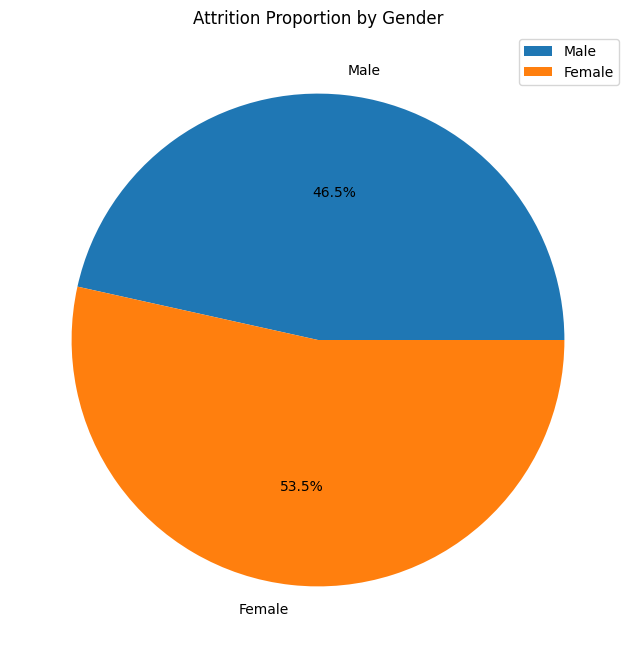

In [ ]:
# Group by 'Gender' and 'Attrition', count occurrences
attrition_by_gender = df.groupby(['Gender', 'Attrition']).size().unstack(fill_value=0)

# Calculate proportions of Attrition by Gender
attrition_by_gender_percentage = (attrition_by_gender.div(attrition_by_gender.sum(axis=1), axis=0)) * 100

# Plot pie chart for attrition proportions by Gender
attrition_by_gender_percentage.plot.pie(y='Yes', autopct='%1.1f%%', figsize=(8, 8), labels=['Male', 'Female'])
plt.title('Attrition Proportion by Gender')
plt.ylabel('')
plt.show()

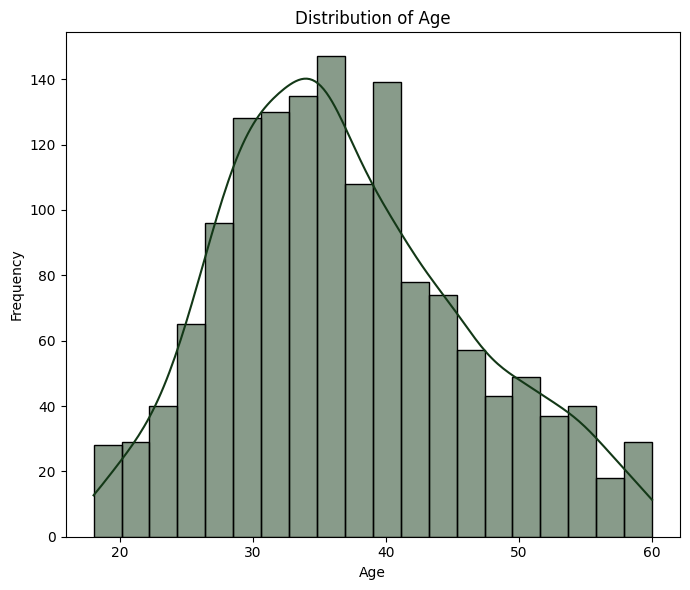

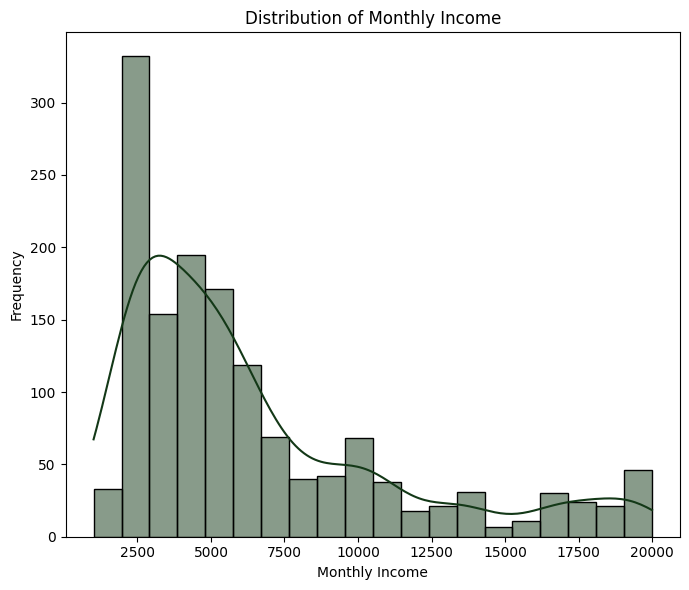

In [ ]:
# Plot for 'Age'
plt.figure(figsize=(7, 6))
sns.histplot(df['Age'], kde=True, bins=20, color='#133817')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot for 'MonthlyIncome'
plt.figure(figsize=(7, 6))
sns.histplot(df['MonthlyIncome'], kde=True, bins=20, color='#133817')
plt.title('Distribution of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

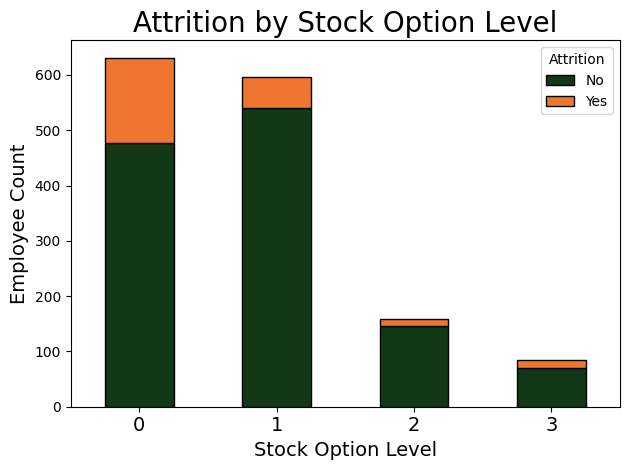

In [ ]:

# Group the data by Attrition and StockOptionLevel
attrition_stock = df.groupby(['StockOptionLevel', 'Attrition']).size().unstack().fillna(0)

# Plotting a stacked bar chart for Attrition by StockOptionLevel
plt.figure(figsize=(10, 6))
attrition_stock.plot(kind='bar', stacked=True, color=[ '#133817' ,'#ee7630'], edgecolor='black')

# Add titles and labels
plt.title('Attrition by Stock Option Level', fontsize=20)
plt.xlabel('Stock Option Level', fontsize=14)
plt.ylabel('Employee Count', fontsize=14)

# Make the background of axes transparent
plt.gca().set_facecolor('none')  # Set axes background to transparent
plt.gcf().patch.set_alpha(0)  # Set figure background to transparent

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, fontsize=14)

# Display the plot with tight layout
plt.tight_layout()

# Show the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

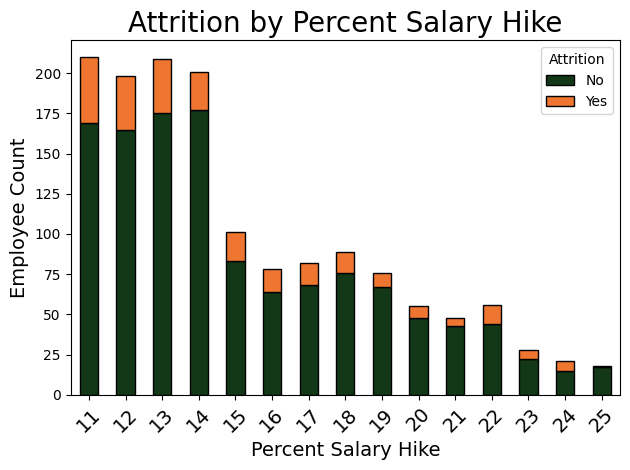

In [ ]:
# Group the data by Attrition and PercentSalaryHike
attrition_salary_hike = df.groupby(['PercentSalaryHike', 'Attrition']).size().unstack().fillna(0)

# Plotting a stacked bar chart for Attrition by PercentSalaryHike
plt.figure(figsize=(12, 6))
attrition_salary_hike.plot(kind='bar', stacked=True, color=['#133817' ,'#ee7630'], edgecolor='black')

# Add titles and labels
plt.title('Attrition by Percent Salary Hike', fontsize=20)
plt.xlabel('Percent Salary Hike', fontsize=14)
plt.ylabel('Employee Count', fontsize=14)

# Make the background of axes transparent
plt.gca().set_facecolor('none')  # Set axes background to transparent
plt.gcf().patch.set_alpha(0)  # Set figure background to transparent

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=14)

# Display the plot with tight layout
plt.tight_layout()

# Show the plot
plt.show()

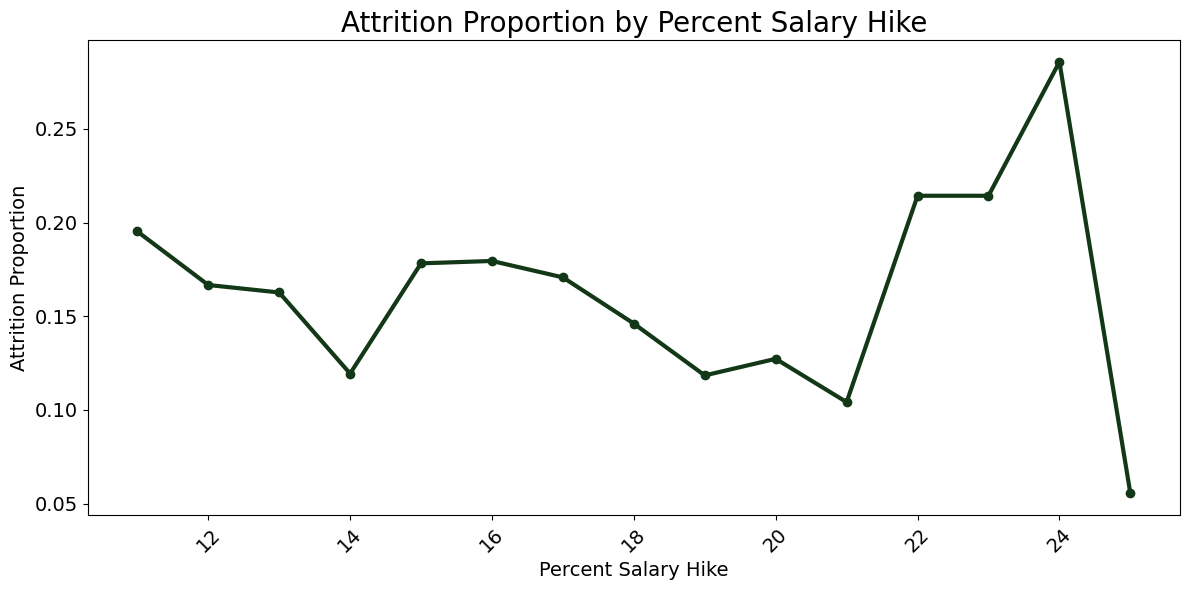

In [ ]:
# Group the data by PercentSalaryHike and Attrition and count the occurrences
attrition_salary_hike = df.groupby(['PercentSalaryHike', 'Attrition']).size().unstack().fillna(0)

# Calculate the proportion of 'Yes' attrition (employees who left) for each salary hike percentage
attrition_proportion = attrition_salary_hike['Yes'] / (attrition_salary_hike['Yes'] + attrition_salary_hike['No'])

# Plotting a line chart for Attrition Proportion by Percent Salary Hike
plt.figure(figsize=(12, 6))

# Create the line plot
plt.plot(attrition_proportion.index, attrition_proportion, marker='o', color='#133817', linewidth=3)

# Add titles and labels
plt.title('Attrition Proportion by Percent Salary Hike', fontsize=20)
plt.xlabel('Percent Salary Hike', fontsize=14)
plt.ylabel('Attrition Proportion', fontsize=14)

# Make the background of axes transparent
plt.gca().set_facecolor('none')  # Set axes background to transparent
plt.gcf().patch.set_alpha(0)  # Set figure background to transparent

# Adjust tick font sizes
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

# Display the plot with tight layout
plt.tight_layout()

# Show the plot
plt.show()

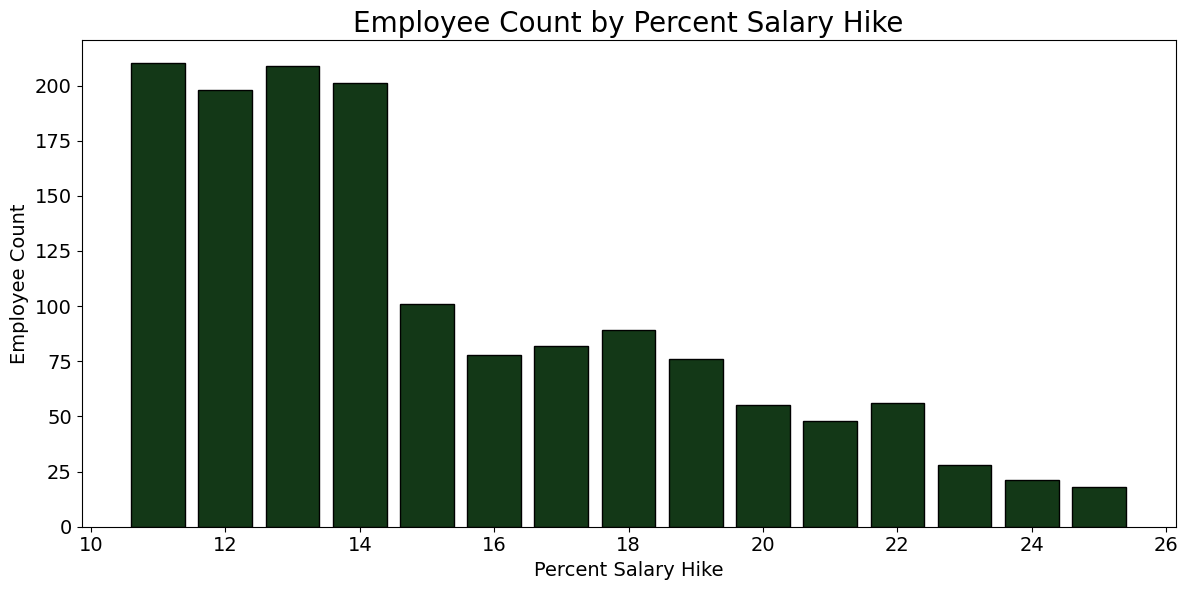

In [ ]:
# Group by 'PercentSalaryHike' and count the number of employees for each salary hike
salary_hike_counts = df['PercentSalaryHike'].value_counts().sort_index()

# Plotting the bar chart for Percent Salary Hike vs Employee Count
plt.figure(figsize=(12, 6))

# Create the bar plot
plt.bar(salary_hike_counts.index, salary_hike_counts.values, color='#133817', edgecolor='black')

# Add titles and labels
plt.title('Employee Count by Percent Salary Hike', fontsize=20)
plt.xlabel('Percent Salary Hike', fontsize=14)
plt.ylabel('Employee Count', fontsize=14)

# Adjust tick font sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Make the background of axes transparent
plt.gca().set_facecolor('none')  # Set axes background to transparent
plt.gcf().patch.set_alpha(0)  # Set figure background to transparent

# Display the plot with tight layout
plt.tight_layout()

# Show the plot
plt.show()

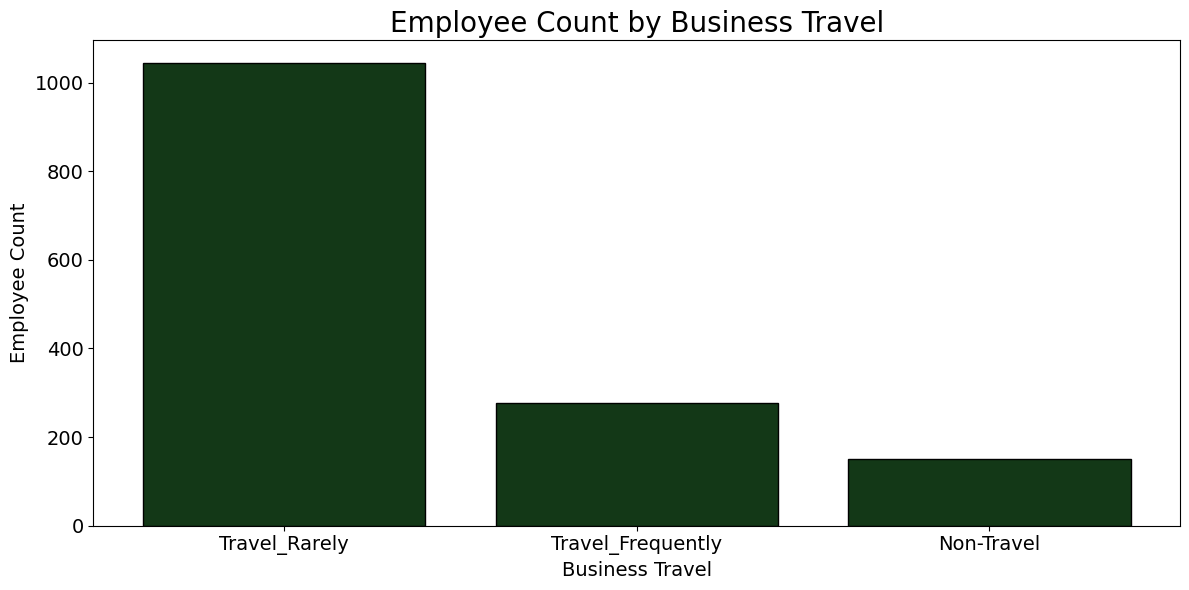

In [ ]:
# Count the number of employees in each 'BusinessTravel' category
business_travel_counts = df['BusinessTravel'].value_counts()

# Plotting the bar chart for Business Travel vs Employee Count
plt.figure(figsize=(12, 6))

# Create the bar plot
plt.bar(business_travel_counts.index, business_travel_counts.values, color='#133817', edgecolor='black')

# Add titles and labels
plt.title('Employee Count by Business Travel', fontsize=20)
plt.xlabel('Business Travel', fontsize=14)
plt.ylabel('Employee Count', fontsize=14)

# Adjust tick font sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Make the background of axes transparent
plt.gca().set_facecolor('none')  # Set axes background to transparent
plt.gcf().patch.set_alpha(0)  # Set figure background to transparent

# Display the plot with tight layout
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-51-5624be2589f9>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_business_travel = df.groupby(['BusinessTravel', 'Attrition']).size().unstack().fillna(0)


<Figure size 1200x600 with 0 Axes>

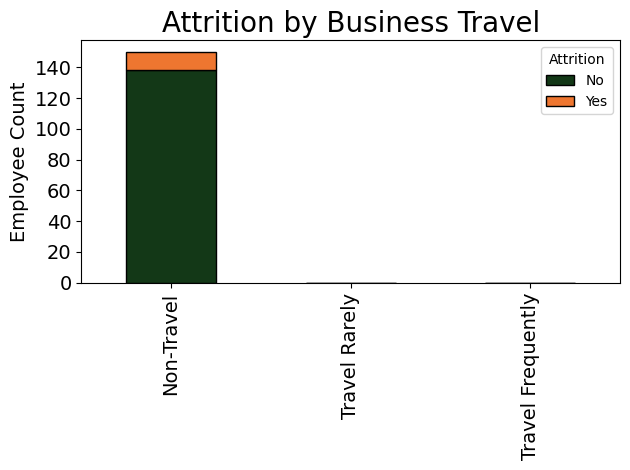

In [ ]:
# Reorder the 'BusinessTravel' categories
df['BusinessTravel'] = pd.Categorical(df['BusinessTravel'], categories=['Non-Travel', 'Travel Rarely', 'Travel Frequently'], ordered=True)

# Group by 'BusinessTravel' and 'Attrition' and count the number of occurrences
attrition_business_travel = df.groupby(['BusinessTravel', 'Attrition']).size().unstack().fillna(0)

# Plotting a stacked bar chart for Business Travel and Attrition
plt.figure(figsize=(12, 6))

# Create the stacked bar plot
attrition_business_travel.plot(kind='bar', stacked=True, color=['#133817', '#ee7630'], edgecolor='black')

# Add titles and labels
plt.title('Attrition by Business Travel', fontsize=20)
plt.xlabel('Business Travel', fontsize=14)
plt.ylabel('Employee Count', fontsize=14)

# Remove the x-axis title
plt.gca().set_xlabel('')

# Adjust tick font sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Make the background of axes transparent
plt.gca().set_facecolor('none')  # Set axes background to transparent
plt.gcf().patch.set_alpha(0)  # Set figure background to transparent

# Display the plot with tight layout
plt.tight_layout()

# Show the plot
plt.show()

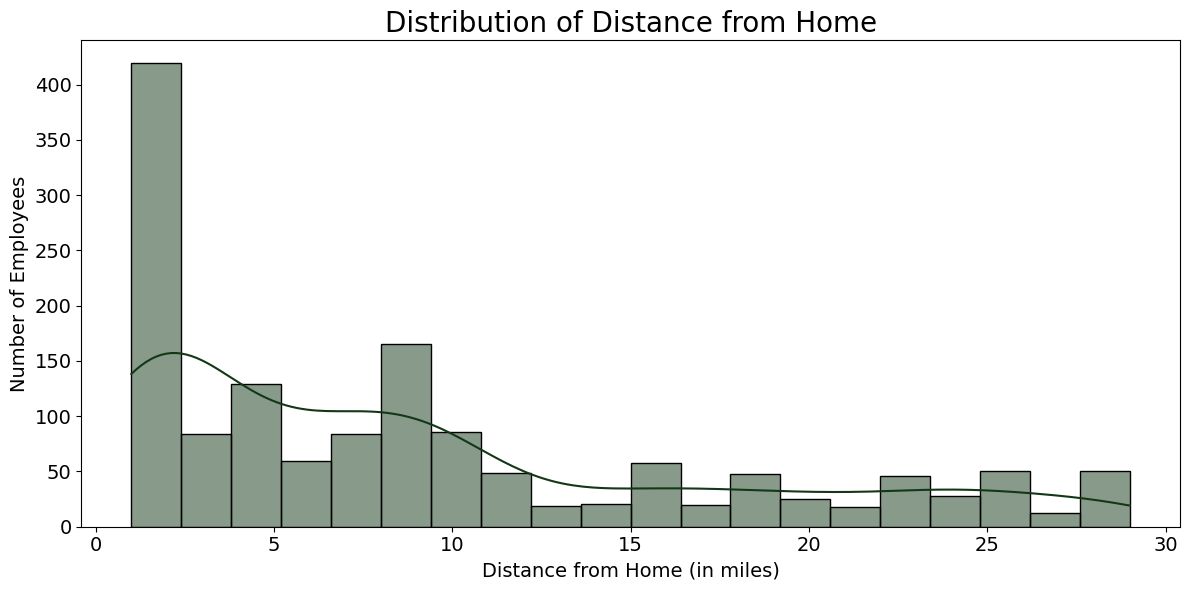

In [ ]:
# Plotting the histogram for DistanceFromHome
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(df['DistanceFromHome'], kde=True, bins=20, color='#133817', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Distance from Home', fontsize=20)
plt.xlabel('Distance from Home (in miles)', fontsize=14)
plt.ylabel('Number of Employees', fontsize=14)

# Adjust tick font sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Make the background of axes transparent
plt.gca().set_facecolor('none')  # Set axes background to transparent
plt.gcf().patch.set_alpha(0)  # Set figure background to transparent

# Display the plot with tight layout
plt.tight_layout()

# Show the plot
plt.show()